In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!source /content/drive/MyDrive/colab_env/bin/activate

In [3]:
import pandas as pd
import numpy as np
import pyarrow
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lars, LarsCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import plotly.express as px
from sklearn.feature_selection import RFE, SelectKBest, f_regression, SelectFromModel
from sklearn.tree import DecisionTreeRegressor
import math
from scipy import stats
from sklearn.pipeline import Pipeline
from tqdm import tqdm
from numpy import mean, std
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import seaborn as sns
from scipy.stats import pearsonr
from xgboost import XGBRegressor

In [ ]:
monthly_dataset = pd.read_parquet("C:\Users\acer\Desktop\final_code\data\monthly_dataset_3sep.parquet", engine='pyarrow')
# /content/drive/MyDrive/EC_Tower/monthly_dataset_3sep.parquet

# Clean Data

In [5]:
monthly_dataset = monthly_dataset.drop(["evaporation_from_bare_soil_max",
                                        "evaporation_from_bare_soil_min",
                                        "evaporation_from_bare_soil_sum",
                                        "evaporation_from_open_water_surfaces_excluding_oceans_max",
                                        "evaporation_from_open_water_surfaces_excluding_oceans_min",
                                        "evaporation_from_open_water_surfaces_excluding_oceans_sum",
                                        "evaporation_from_the_top_of_canopy_max",
                                        "evaporation_from_the_top_of_canopy_min",
                                        "evaporation_from_the_top_of_canopy_sum",
                                        "evaporation_from_vegetation_transpiration_max",
                                        "evaporation_from_vegetation_transpiration_min",
                                        "evaporation_from_vegetation_transpiration_sum",
                                        "forecast_albedo_min",
                                        "lake_bottom_temperature",
                                        "lake_bottom_temperature_max",
                                        "lake_bottom_temperature_min",
                                        "lake_ice_depth",
                                        "lake_ice_depth_max",
                                        "lake_ice_depth_min",
                                        "lake_ice_temperature",
                                        "lake_ice_temperature_max",
                                        "lake_ice_temperature_min",
                                        "lake_mix_layer_depth",
                                        "lake_mix_layer_depth_max",
                                        "lake_mix_layer_depth_min",
                                        "lake_mix_layer_temperature",
                                        "lake_mix_layer_temperature_max",
                                        "lake_mix_layer_temperature_min",
                                        "lake_shape_factor",
                                        "lake_shape_factor_max",
                                        "lake_shape_factor_min",
                                        "lake_total_layer_temperature",
                                        "lake_total_layer_temperature_max",
                                        "lake_total_layer_temperature_min",
                                        "potential_evaporation_max",
                                        "potential_evaporation_min",
                                        "potential_evaporation_sum",
                                        "runoff_max",
                                        "runoff_min",
                                        "runoff_sum",
                                        "skin_reservoir_content",
                                        "skin_reservoir_content_max",
                                        "skin_reservoir_content_min",
                                        "skin_temperature",
                                        "skin_temperature_max",
                                        "skin_temperature_min",
                                        "snow_albedo",
                                        "snow_albedo_max",
                                        "snow_albedo_min",
                                        "snow_cover",
                                        "snow_cover_max",
                                        "snow_cover_min",
                                        "snow_density",
                                        "snow_density_max",
                                        "snow_density_min",
                                        "snow_depth",
                                        "snow_depth_max",
                                        "snow_depth_min",
                                        "snow_depth_water_equivalent",
                                        "snow_depth_water_equivalent_max",
                                        "snow_depth_water_equivalent_min",
                                        "snow_evaporation_max",
                                        "snow_evaporation_min",
                                        "snow_evaporation_sum",
                                        "snowfall_max",
                                        "snowfall_min",
                                        "snowfall_sum",
                                        "snowmelt_max",
                                        "snowmelt_min",
                                        "snowmelt_sum",
                                        "sub_surface_runoff_max",
                                        "sub_surface_runoff_min",
                                        "sub_surface_runoff_sum",
                                        "surface_latent_heat_flux_max",
                                        "surface_latent_heat_flux_min",
                                        "surface_latent_heat_flux_sum",
                                        "surface_net_solar_radiation_min",
                                        "surface_net_thermal_radiation_max",
                                        "surface_net_thermal_radiation_min",
                                        "surface_net_thermal_radiation_sum",
                                        "surface_runoff_max",
                                        "surface_runoff_min",
                                        "surface_runoff_sum",
                                        "surface_sensible_heat_flux_min",
                                        "surface_sensible_heat_flux_sum",
                                        "surface_solar_radiation_downwards_min",
                                        "surface_solar_radiation_downwards_sum",
                                        "surface_thermal_radiation_downwards_sum",
                                        "temperature_of_snow_layer",
                                        "temperature_of_snow_layer_max",
                                        "temperature_of_snow_layer_min",
                                        "total_evaporation_max",
                                        "total_evaporation_min",
                                        "total_evaporation_sum",
                                        "total_precipitation_min",
                                        "total_precipitation_sum",
                                        "u_component_of_wind_10m",
                                        "u_component_of_wind_10m_min",
                                        "v_component_of_wind_10m",
                                        "v_component_of_wind_10m_min",
                                        "leaf_area_index_low_vegetation_max",
                                        "leaf_area_index_low_vegetation_min",
                                        "leaf_area_index_high_vegetation_max",
                                        "leaf_area_index_high_vegetation_min",
                                        "forecast_albedo_max",
                                        "soil_temperature_level_1_max",
                                        "soil_temperature_level_1_min",
                                        "soil_temperature_level_2_max",
                                        "soil_temperature_level_2_min",
                                        "soil_temperature_level_3_max",
                                        "soil_temperature_level_3_min",
                                        "soil_temperature_level_4_min",
                                        "soil_temperature_level_4_max",
                                        "volumetric_soil_water_layer_1_max",
                                        "volumetric_soil_water_layer_1_min",
                                        "volumetric_soil_water_layer_2_max",
                                        "volumetric_soil_water_layer_2_min",
                                        "volumetric_soil_water_layer_3_max",
                                        "volumetric_soil_water_layer_3_min",
                                        "volumetric_soil_water_layer_4_max",
                                        "volumetric_soil_water_layer_4_min",
                                        "swe"], axis = 1)

In [6]:
def subtract_lists(list1, list2):
    return list(set(list1) - set(list2))


def searchcv(param_dict, model, x, y, cv=5):

  # Perform RandomizedSearchCV to find the best hyperparameters
  grid_search = GridSearchCV(estimator=model, param_grid=param_dict, cv=cv, n_jobs=-1, scoring='r2')

  grid_search.fit(x, y)

  # Best parameters
  best_params = grid_search.best_params_
  print('Best parameters found: ', best_params)

  # Train the model with the best parameters
  best_model = grid_search.best_estimator_

  return best_params, best_model


def calculate_metrics(actual, predicted):

    actual = actual
    predicted = predicted

    rmse = np.sqrt(mean_squared_error(actual, predicted))

    nse = 1 - (np.sum((actual - predicted) ** 2) / np.sum((actual - np.mean(actual)) ** 2))

    nrmse = rmse / (np.max(actual) - np.min(actual))

    r = stats.pearsonr(predicted,actual)[0]
    r2= r**2

    mean_value = sum(predicted) / len(predicted)
    var_value = sum(pow(x-mean_value,2) for x in predicted) / len(predicted)  # variance
    std  = math.sqrt(var_value)  # standard deviation

    mbe = np.mean(predicted - actual)  # Mean Bias Error

    return rmse, nse, nrmse, r2, r, std, mbe


# Yearly data

In [ ]:


clean_monthly_dataset = monthly_dataset.drop(['General_classification',
                                              'Land_cover_details',
                                              'Land_cover_type',
                                              'time',
                                              'date',
                                              'Month',
                                              'Year',
                                              'Site_ID'], axis =1)

# List of columns to sum (replace with your actual column names)
sum_columns = ['evaporation_from_vegetation_transpiration_sum',
               'potential_evaporation_max',
               'potential_evaporation_min',
                'potential_evaporation_sum',
                'runoff_max',
                'runoff_min',
                'runoff_sum',
                'skin_reservoir_content',
                'skin_reservoir_content_max',
                'skin_reservoir_content_min',
                'snow_depth',
                'snow_depth_max',
                'snow_depth_min',
                'snow_depth_water_equivalent',
                'snow_depth_water_equivalent_max',
                'snow_depth_water_equivalent_min',
                'snow_evaporation_max',
                'snow_evaporation_min',
                'snow_evaporation_sum',
                'snowfall_max',
                'snowfall_min',
                'snowfall_sum',
                'snowmelt_max',
                'snowmelt_min',
                'snowmelt_sum',
                'sub_surface_runoff_max',
                'sub_surface_runoff_min',
                'sub_surface_runoff_sum',
                'surface_runoff_max',
                'surface_runoff_min',
                'surface_runoff_sum',
                'total_evaporation_max',
                'total_evaporation_min',
                'total_evaporation_sum',
                'total_precipitation_max',
                'total_precipitation_min',
                'total_precipitation_sum',
                'volumetric_soil_water_layer_1',
                'volumetric_soil_water_layer_1_max',
                'volumetric_soil_water_layer_1_min',
                'volumetric_soil_water_layer_2',
                'volumetric_soil_water_layer_2_max',
                'volumetric_soil_water_layer_2_min',
                'volumetric_soil_water_layer_3',
                'volumetric_soil_water_layer_3_max',
                'volumetric_soil_water_layer_3_min',
                'volumetric_soil_water_layer_4',
                'volumetric_soil_water_layer_4_max',
                'volumetric_soil_water_layer_4_min',
                'aet',
                'def',
                'pet',
                'pr',
                'ro',
                'soil',
                'swe',
                'delta_s']

mean_columns = subtract_lists(clean_monthly_dataset.columns.to_list(), sum_columns)

In [ ]:
monthly_dataset_1 = monthly_dataset.drop(['General_classification',
                                          'Land_cover_details',
                                          'Land_cover_type',
                                          'time',
                                          'date'], axis =1)

# yearly_dataset = monthly_dataset_1.groupby(['Site_ID', 'Year']).agg({
#     **{col: 'sum' for col in sum_columns},
#     **{col: 'mean' for col in mean_columns}
#     }).reset_index()

yearly_dataset = monthly_dataset_1.groupby(['Site_ID', 'Year']).agg('mean').reset_index()


In [ ]:
yearly_dataset_1 = yearly_dataset.drop(["Site_ID"], axis=1)
yearly_dataset_basin = yearly_dataset_1.groupby(['Year']).agg('median').reset_index()


X = yearly_dataset.drop(['Site_ID',
                         'ET_fill',
                         'eto_hargreaves',
                         'Month'], axis =1)

y = yearly_dataset['ET_fill']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Anomaly data

In [ ]:
monthly_data_for_basin = monthly_dataset.groupby(['Year', 'Month']).agg('median').reset_index()

anomalydata = monthly_data_for_basin.groupby(['Month']).agg('mean').reset_index()

# Monthly data

In [7]:
X = monthly_dataset.drop(['ET_fill',
                          'Site_ID',
                          'General_classification',
                          'Land_cover_details',
                          'Land_cover_type',
                          'eto_hargreaves',
                          'time',
                          'date',
                          'aet',
                          'pet',
                          'delta_s',
                          'def'], axis =1)

# X = monthly_dataset.drop(['ET_fill',
#                        'Site_ID',
#                        'General_classification',
#                        'Land_cover_details',
#                        'Land_cover_type',
#                        'eto_hargreaves',
#                        'evaporation_from_bare_soil_max',
#                        'evaporation_from_bare_soil_min',
#                        'evaporation_from_bare_soil_sum',
#                        'evaporation_from_open_water_surfaces_excluding_oceans_max',
#                        'evaporation_from_open_water_surfaces_excluding_oceans_min',
#                        'evaporation_from_open_water_surfaces_excluding_oceans_sum',
#                        'evaporation_from_the_top_of_canopy_max',
#                        'evaporation_from_the_top_of_canopy_min',
#                        'evaporation_from_the_top_of_canopy_sum',
#                        'evaporation_from_vegetation_transpiration_max',
#                        'evaporation_from_vegetation_transpiration_min',
#                        'evaporation_from_vegetation_transpiration_sum',
#                        'potential_evaporation_max',
#                        'potential_evaporation_min',
#                        'potential_evaporation_sum',
#                        'total_evaporation_max',
#                        'total_evaporation_min',
#                        'total_evaporation_sum',
#                        'aet',
#                        'pet',
#                        'time',
#                        'date'], axis =1)

y = monthly_dataset['ET_fill']





# select good n feature

In [8]:
n_x = X.shape[1]
def get_models():
    models = dict()
    for i in range(2, n_x + 1):
        rfe = RFE(
            estimator=XGBRegressor(n_estimators=10, verbosity=0),
            n_features_to_select=i
        )
        model = XGBRegressor(n_estimators=10, verbosity=0)
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

def evaluate_model(model, x, y):
    cv = RepeatedKFold(
        n_splits=10,
        n_repeats=3,
        random_state=1
    )
    scores = cross_val_score(
        model,
        x,
        y,
        scoring='neg_root_mean_squared_error',
        cv=cv,
        n_jobs=-1,
        error_score='raise'
    )
    return scores

In [9]:
models = get_models()

In [10]:
#list_1 = dict(list(models.items())[30:])

results, names = list(), list()

for name, model in models.items():






    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>2 -7.167 (1.499)
>3 -6.290 (1.139)
>4 -6.111 (1.175)
>5 -6.125 (1.137)
>6 -5.864 (0.969)
>7 -5.810 (1.015)
>8 -5.757 (1.052)
>9 -5.632 (1.034)
>10 -5.657 (1.110)
>11 -5.673 (1.086)
>12 -5.523 (1.057)
>13 -5.516 (1.203)
>14 -5.476 (1.097)
>15 -5.602 (1.123)
>16 -5.566 (1.088)
>17 -5.538 (1.055)
>18 -5.579 (1.113)
>19 -5.542 (0.968)
>20 -5.555 (1.054)
>21 -5.627 (1.061)
>22 -5.579 (1.061)
>23 -5.604 (1.062)
>24 -5.528 (1.007)
>25 -5.520 (1.017)
>26 -5.580 (1.011)
>27 -5.499 (1.011)
>28 -5.595 (1.128)
>29 -5.581 (1.092)
>30 -5.546 (1.041)
>31 -5.564 (1.017)
>32 -5.514 (1.032)
>33 -5.572 (1.034)
>34 -5.603 (1.055)
>35 -5.628 (1.026)
>36 -5.600 (1.017)
>37 -5.609 (1.034)
>38 -5.603 (1.024)
>39 -5.597 (1.023)
>40 -5.604 (1.011)
>41 -5.631 (1.013)
>42 -5.629 (1.001)
>43 -5.623 (1.006)
>44 -5.624 (1.004)
>45 -5.624 (1.004)
>46 -5.624 (1.004)
>47 -5.624 (1.004)
>48 -5.624 (1.004)


In [ ]:

result_chart = pd.DataFrame({
    'Name': names,
    'Result': results
})
result_chart.to_parquet("C:\Users\acer\Desktop\final_code\export\boxplot\result_XY_chart_xgb_chartcv_20apr.parquet",
                  engine="pyarrow")
# /content/drive/MyDrive/EC_Tower/result/result_XY_chart_xgb_chartcv_20apr.parquet

In [ ]:
result_chart = pd.read_parquet("C:\Users\acer\Desktop\final_code\export\boxplot\result_XY_chart_xgb_chartcv_20apr.parquet", engine='pyarrow')
list(result_chart["Result"][0])
# /content/drive/MyDrive/EC_Tower/result/result_XY_chart_xgb_chartcv_20apr.parquet

[np.float64(-6.190703292811308),
 np.float64(-7.201727683207654),
 np.float64(-10.037862442923805),
 np.float64(-6.171886192724644),
 np.float64(-6.065449216469164),
 np.float64(-5.73553058839269),
 np.float64(-6.678892579639696),
 np.float64(-9.022684135851557),
 np.float64(-6.4622837075089885),
 np.float64(-6.606708381785088),
 np.float64(-5.401664243963513),
 np.float64(-5.92390030850655),
 np.float64(-7.397521941593255),
 np.float64(-8.767476253567386),
 np.float64(-7.269857001910247),
 np.float64(-8.592913914786969),
 np.float64(-7.948321049598074),
 np.float64(-11.043713094873985),
 np.float64(-4.781736013653338),
 np.float64(-4.810187998995703),
 np.float64(-5.333314948770597),
 np.float64(-7.592377879329024),
 np.float64(-6.015491528010392),
 np.float64(-8.837604246520453),
 np.float64(-7.271523641232863),
 np.float64(-5.949445251067671),
 np.float64(-7.390150212306809),
 np.float64(-8.23883788178226),
 np.float64(-7.44079968004917),
 np.float64(-8.840448919047121)]

In [13]:
result_chart['result_list'] = None
for i in range(0,len(result_chart)):
  result_chart['result_list'][i] = list(result_chart["Result"][i])

<ipython-input-13-7d908abeb81f>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  result_chart['result_list'][i] = list(result_chart["Result"][i])
<ipython-input-13-7d908abeb81f>:3: FutureWarning: ChainedAssignmentError: behaviour will change

In [14]:
result_filtered = result_chart[:][:14]
result_filtered

,Name,Result,result_list
0,2,"[-6.190703292811308, -7.201727683207654, -10.0...","[-6.190703292811308, -7.201727683207654, -10.0..."
1,3,"[-5.400451962916767, -6.952480075341889, -7.29...","[-5.400451962916767, -6.952480075341889, -7.29..."
2,4,"[-4.960875699759588, -7.148247141941722, -8.45...","[-4.960875699759588, -7.148247141941722, -8.45..."
3,5,"[-6.093189706379707, -6.769469396058115, -8.81...","[-6.093189706379707, -6.769469396058115, -8.81..."
4,6,"[-5.758192158690155, -6.851477096910213, -7.86...","[-5.758192158690155, -6.851477096910213, -7.86..."
5,7,"[-5.549079912821385, -7.188409982998542, -7.79...","[-5.549079912821385, -7.188409982998542, -7.79..."
6,8,"[-5.989520233940162, -7.603228639708542, -7.23...","[-5.989520233940162, -7.603228639708542, -7.23..."
7,9,"[-5.404311240788008, -7.238262347780735, -7.18...","[-5.404311240788008, -7.238262347780735, -7.18..."
8,10,"[-5.90393088365937, -7.394140566884699, -7.982...","[-5.90393088365937, -7.394140566884699, -7.982..."
9,11,"[-5.843203420538805, -7.432676429163916, -7.62...","[-5.843203420538805, -7.432676429163916, -7.62..."


In [15]:
def divide_list_by_scalar(rmse_list, scalar):
    return [x / scalar for x in rmse_list]

In [16]:
def make_positive(rmse_list):
    return [-x for x in rmse_list]

result_filtered['result_list_positive'] = result_filtered['result_list'].apply(make_positive)
result_filtered['Mean_Result_positive'] = result_filtered['result_list_positive'].apply(np.mean)
result_filtered['Normalized_Result'] = result_filtered.apply(lambda row: divide_list_by_scalar(row['result_list_positive'], row['Mean_Result_positive']), axis=1)

result_filtered

,Name,Result,result_list,result_list_positive,Mean_Result_positive,Normalized_Result
0,2,"[-6.190703292811308, -7.201727683207654, -10.0...","[-6.190703292811308, -7.201727683207654, -10.0...","[6.190703292811308, 7.201727683207654, 10.0378...",7.167367,"[0.8637346421634872, 1.0047940256864512, 1.400..."
1,3,"[-5.400451962916767, -6.952480075341889, -7.29...","[-5.400451962916767, -6.952480075341889, -7.29...","[5.400451962916767, 6.952480075341889, 7.29726...",6.290489,"[0.8585107364380632, 1.1052369006406284, 1.160..."
2,4,"[-4.960875699759588, -7.148247141941722, -8.45...","[-4.960875699759588, -7.148247141941722, -8.45...","[4.960875699759588, 7.148247141941722, 8.45288...",6.110852,"[0.8118140207672745, 1.169762680008111, 1.3832..."
3,5,"[-6.093189706379707, -6.769469396058115, -8.81...","[-6.093189706379707, -6.769469396058115, -8.81...","[6.093189706379707, 6.769469396058115, 8.81586...",6.125421,"[0.9947381782320545, 1.105143607720272, 1.4392..."
4,6,"[-5.758192158690155, -6.851477096910213, -7.86...","[-5.758192158690155, -6.851477096910213, -7.86...","[5.758192158690155, 6.851477096910213, 7.86873...",5.863865,"[0.9819790008159368, 1.1684234301877865, 1.341..."
5,7,"[-5.549079912821385, -7.188409982998542, -7.79...","[-5.549079912821385, -7.188409982998542, -7.79...","[5.549079912821385, 7.188409982998542, 7.79482...",5.809601,"[0.95515680311595, 1.2373328203443867, 1.34171..."
6,8,"[-5.989520233940162, -7.603228639708542, -7.23...","[-5.989520233940162, -7.603228639708542, -7.23...","[5.989520233940162, 7.603228639708542, 7.23565...",5.756929,"[1.0404019985968989, 1.320709165939012, 1.2568..."
7,9,"[-5.404311240788008, -7.238262347780735, -7.18...","[-5.404311240788008, -7.238262347780735, -7.18...","[5.404311240788008, 7.238262347780735, 7.18968...",5.631601,"[0.9596402228172265, 1.2852937928166075, 1.276..."
8,10,"[-5.90393088365937, -7.394140566884699, -7.982...","[-5.90393088365937, -7.394140566884699, -7.982...","[5.90393088365937, 7.394140566884699, 7.982454...",5.656582,"[1.0437277042602493, 1.3071747469490547, 1.411..."
9,11,"[-5.843203420538805, -7.432676429163916, -7.62...","[-5.843203420538805, -7.432676429163916, -7.62...","[5.843203420538805, 7.432676429163916, 7.62555...",5.673176,"[1.0299703356715222, 1.3101437149654902, 1.344..."


<ipython-input-17-65ac33e0c815>:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(


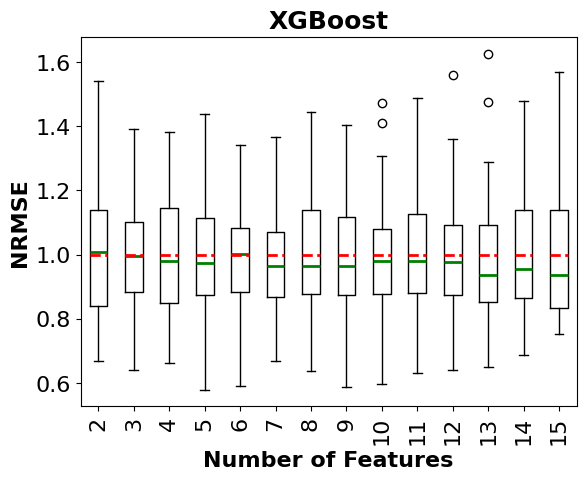

In [17]:

pyplot.boxplot(
    list(result_filtered["Normalized_Result"]),
    labels=list(result_filtered["Name"]),
    showmeans=True,  # Show the mean
    meanline=True,  # Display mean as a line instead of a dot
    meanprops={"color": "red", "linewidth": 2},  # Customize the mean line
    medianprops={"color": "green", "linewidth": 2}  # Change median line color to green
)

pyplot.title("XGBoost", fontsize=18, fontweight='bold')
pyplot.xlabel("Number of Features", fontsize=16, fontweight='bold')
pyplot.ylabel("NRMSE", fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
pyplot.show()

# Plot Coorelation Features

In [ ]:
#terra - 13
# df = monthly_dataset[[
#     'aet',
#     'def',
#     'pdsi',
#     'pet',
#     'pr',
#     'ro',
#     'soil',
#     'srad',
#     'tmmx',
#     'tmmn',
#     'vap',
#     'vpd',
#     'vs',
#     'ET_fill']]

# df = df.rename(columns={'def': 'Wdef',
#                         'srad': 'Srad',
#                         'tmmx': 'Tmax',
#                         'tmmn': 'Tmin',
#                         'vpd': 'Vpd',
#                         'ET_fill': 'ETa',
#                         'pet': 'PET'})

#Era5 - 15  - 'ET_fill'
df = monthly_dataset.drop(['aet',
                           'def',
                           'pdsi',
                           'pet',
                           'pr',
                           'ro',
                           'soil',
                           'srad',
                           'tmmx',
                           'tmmn',
                           'vap',
                           'vpd',
                           'vs',
                           'Site_ID',
                           'General_classification',
                           'Land_cover_details',
                           'Land_cover_type',
                           'time',
                           'date',
                           "category_encoded_Site_ID",
                           "category_encoded_General_classification",
                           "category_encoded_Land_cover_details",
                           "category_encoded_Land_cover_type"], axis =1)

df = df.rename(columns={'dewpoint_temperature_2m': 'dewT2m',
                        'dewpoint_temperature_2m_max': 'dewT2m_max',
                        'dewpoint_temperature_2m_min': 'dewT2m_min',
                        'leaf_area_index_high_vegetation': 'lai_high',
                        'leaf_area_index_low_vegetation': 'lai_low',
                        'soil_temperature_level_1': 'soilT_1',
                        'soil_temperature_level_2': 'soilT_2',
                        'soil_temperature_level_3': 'soilT_3',
                        'soil_temperature_level_4': 'soilT_4',
                        'surface_net_solar_radiation_max': 'r_max',
                        'surface_net_solar_radiation_sum': 'r_sum',
                        'surface_pressure': 's_pressure',
                        'surface_pressure_max': 's_p_max',
                        'surface_pressure_min': 's_p_min',
                        'surface_sensible_heat_flux_max': 'ss_heat_flux_max',
                        'surface_solar_radiation_downwards_max': 'ss_r_d_max',
                        'surface_thermal_radiation_downwards_max': 'st_r_d_max',
                        'surface_thermal_radiation_downwards_min': 'st_r_d_min',
                        'temperature_2m': 'T_2m',
                        'temperature_2m_max': 'T_2m_max',
                        'temperature_2m_min': 'T_2m_min',
                        'total_precipitation_max': 'pr_max',
                        'u_component_of_wind_10m_max': 'u_wind_10m_max',
                        'v_component_of_wind_10m_max': 'v_wind_10m_max',
                        'volumetric_soil_water_layer_1': 'soil_water_1',
                        'volumetric_soil_water_layer_2': 'soil_water_2',
                        'volumetric_soil_water_layer_3': 'soil_water_3',
                        'volumetric_soil_water_layer_4': 'soil_water_4',
                        'ET_fill': 'ETa'})

## Correlation Matrix

In [ ]:
# Function to plot correlation matrix
def plot_correlation_matrix(data, n_features=10, include_feature=None):
    # Calculate the correlation matrix
    corr_matrix = data.corr()

    # Get the upper triangle of the correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find the top n_features pairs with the highest absolute correlation
    top_corr = upper.abs().unstack().sort_values(ascending=False).head(n_features)

    # Get unique features from top correlations
    unique_features = list(set(top_corr.index.get_level_values(0)) | set(top_corr.index.get_level_values(1)))

    # Ensure the specified feature is included
    if include_feature and include_feature in data.columns:
        unique_features.append(include_feature)

    # Remove duplicates while preserving order
    unique_features = list(dict.fromkeys(unique_features))

    # Create a subset of the correlation matrix with only the top correlated features
    corr_subset = corr_matrix.loc[unique_features, unique_features]

    # Set up the matplotlib figure
    plt.figure(figsize=(12, 10))

    # Create a heatmap
    sns.heatmap(corr_subset, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

    # plt.title(f'Correlation Matrix of Top {n_features} Correlated Feature Pairs')
    plt.tight_layout()
    plt.show()

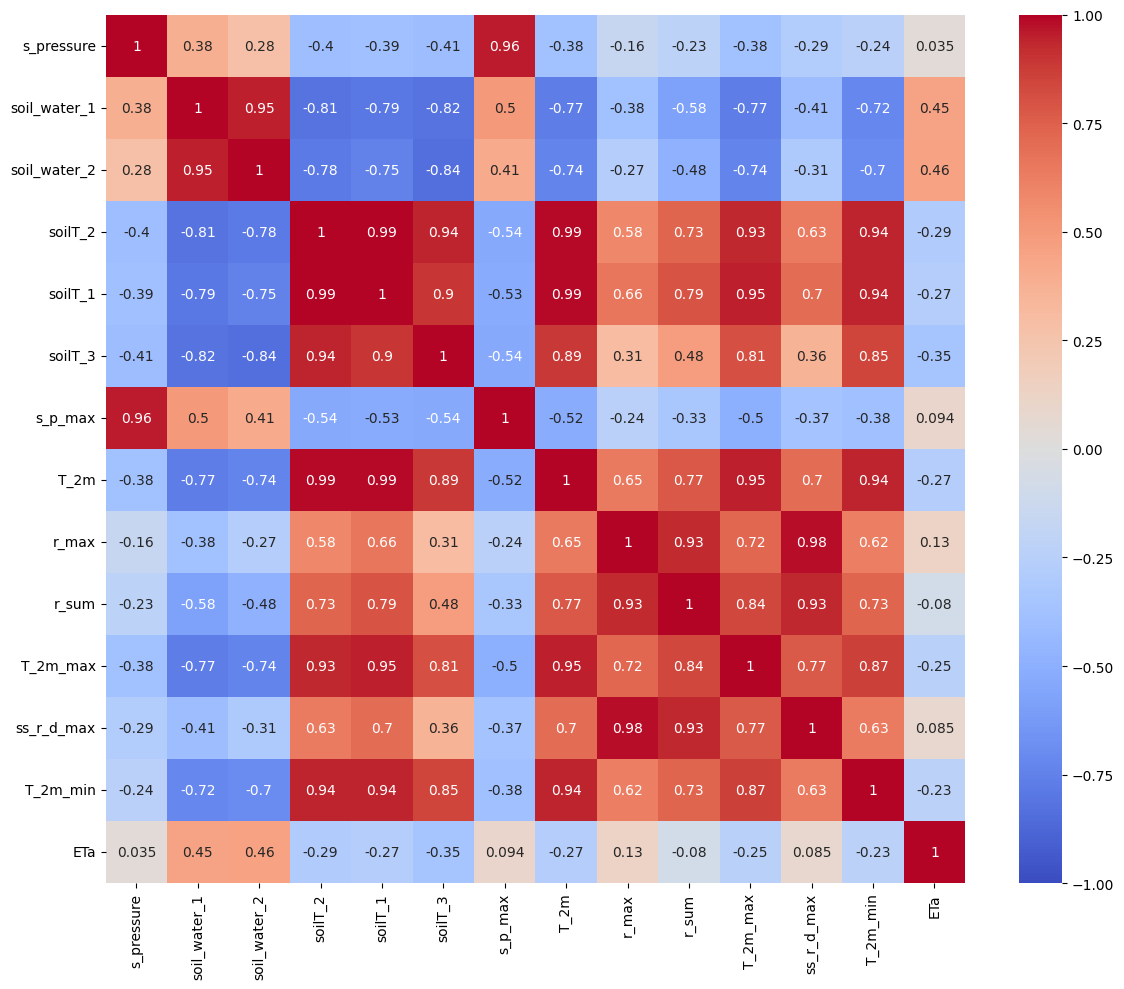

In [ ]:
plot_correlation_matrix(df, n_features=15, include_feature="ETa")

## Scatter Matrix

In [ ]:
def plot_scatter_matrix_highest(data, n_features=5, include_feature=None):
    corr_matrix = data.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]
    to_drop = sorted(to_drop, key=lambda x: upper[x].max(), reverse=True)
    top_features = to_drop[:n_features]

    if include_feature and include_feature in data.columns:
        if include_feature not in top_features:
            top_features.append(include_feature)

    df_subset = data[top_features]
    plot_scatter_matrix(df_subset, top_features, f'Top {n_features} Correlated Features')


def plot_scatter_matrix_lowest(data, n_features=5, include_feature=None):
    corr_matrix = data.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_keep = [column for column in upper.columns if any(upper[column] < 0.5)]
    to_keep = sorted(to_keep, key=lambda x: upper[x].max())
    lowest_features = to_keep[:n_features]

    if include_feature and include_feature in data.columns:
        if include_feature not in lowest_features:
            lowest_features.append(include_feature)

    df_subset = data[lowest_features]
    plot_scatter_matrix(df_subset, lowest_features, f'Least {n_features} Correlated Features')


def plot_scatter_matrix(df_subset, features, title):
    from scipy.stats import pearsonr
    n_features = len(features)
    fig, axes = plt.subplots(nrows=n_features, ncols=n_features, figsize=(12, 10))

    for i, feature1 in enumerate(features):
        for j, feature2 in enumerate(features):
            ax = axes[i, j]

            if i != j:
                ax.scatter(df_subset[feature2], df_subset[feature1], alpha=0.5, color='black', s=10)
                z = np.polyfit(df_subset[feature2], df_subset[feature1], 1)
                p = np.poly1d(z)
                ax.plot(df_subset[feature2], p(df_subset[feature2]), "r--", alpha=0.8)

                r, _ = pearsonr(df_subset[feature2], df_subset[feature1])
                ax.text(0.05, 0.9, f'R={r:.2f}', transform=ax.transAxes, fontsize=12, color='blue')

                if i == n_features - 1:
                    ax.set_xlabel(feature2)
                if j == 0:
                    ax.set_ylabel(feature1)
            else:
                ax.hist(df_subset[feature1], bins=20, color='gray')

            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)

            if i < n_features - 1:
                ax.set_xticks([])
            if j > 0:
                ax.set_yticks([])

    plt.tight_layout()
    plt.suptitle(title, y=1.02)
    plt.show()


### Highest Features

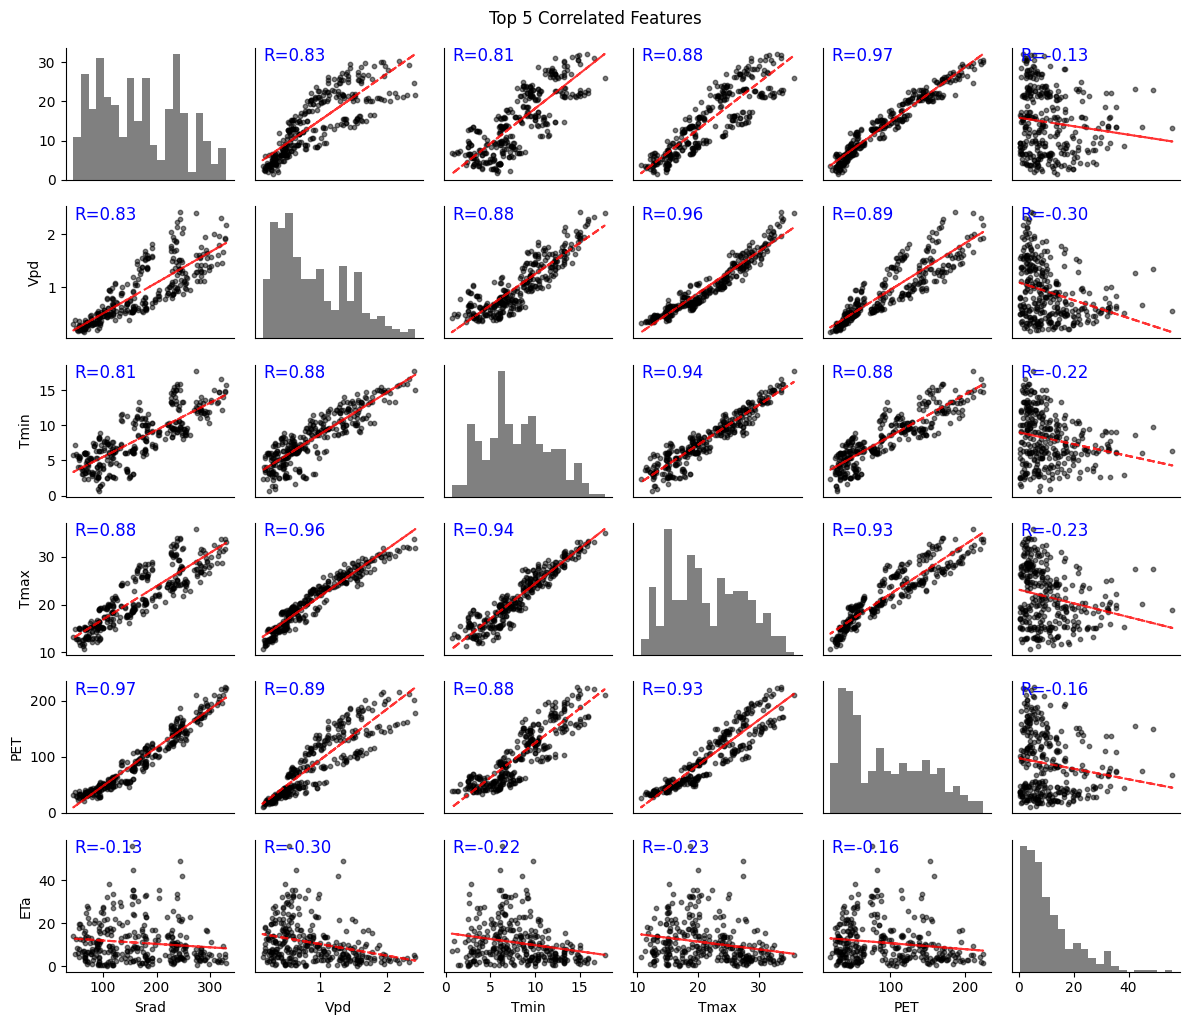

In [ ]:
plot_scatter_matrix_highest(df, n_features=5, include_feature='ETa')

### Lowest Features

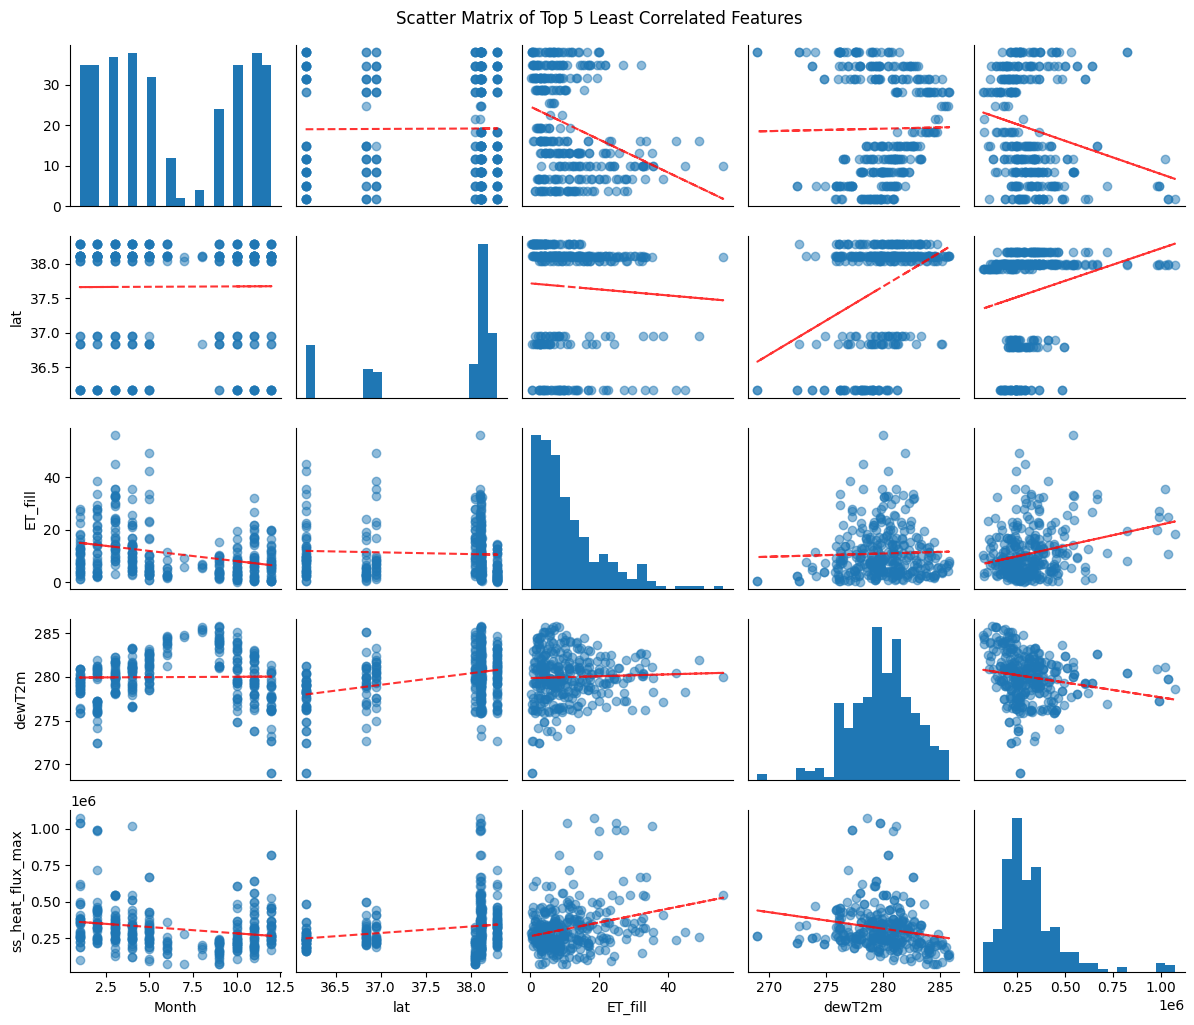

In [ ]:
plot_scatter_matrix_lowest(df, n_features=5)

# xgboost

## search best hyperparameters

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [11]:
param_dist_xgb = {
    'n_estimators': [50, 100, 150],  # Number of boosting rounds
    'max_depth': [3, 5, 7],          # Maximum depth of each tree
    'learning_rate': [0.1, 0.01],    # Step size shrinkage used in update to prevent overfitting
    'gamma': [0, 0.1, 0.2],          # Minimum loss reduction required to make a further partition on a leaf node of the tree
    'subsample': [0.8, 1.0],         # Fraction of samples used to fit each tree
    'colsample_bytree': [0.8, 1.0]   # Fraction of features used to fit each tree
}
best_param_xgb, best_model_xgb = searchcv(
    param_dict =param_dist_xgb,
    model = XGBRegressor(),
    x = X,
    y = y,
    cv=KFold(n_splits=10, shuffle=True, random_state=1))

Best parameters found:  {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


## evaluate model in train and tset

In [14]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_xgb20apr.csv")

# RandomForestRegressor

## search best hyperparameters

In [ ]:
param_dist_rf = {
    'max_depth': [2, 4, 6, 8, 10, None],
    'n_estimators': [10, 50, 100, 200],
    'min_samples_split': [2, 3, 4, 5],
    'max_leaf_nodes': [5, 10, 20, None],
    'random_state': [22]
}

best_param_rf, best_model_rf = searchcv(
    param_dict =param_dist_rf,
    model = RandomForestRegressor(),
    x = X,
    y = y,
    cv=KFold(n_splits=10, shuffle=True, random_state=1))

Best parameters found:  {'max_depth': None, 'max_leaf_nodes': None, 'min_samples_split': 3, 'n_estimators': 100, 'random_state': 22}


## evaluate model in train and tset

In [ ]:
index_result = pd.DataFrame()
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(2, X.shape[1]+1)  # Adjust the step size as needed
models = dict()
# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    selector = RFE(estimator=best_model_rf, n_features_to_select=n_features_to_select)
    selector.fit(X_train, y_train)

    selected_features = X.columns[selector.support_]

    y_train_pred = selector.predict(X_train)
    y_test_pred = selector.predict(X_test)

    base_model = RandomForestRegressor(n_estimators=10)
    models[str(n_features_to_select)] = Pipeline(steps=[('s',selector),('m',base_model)])

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train, mbe_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test, mbe_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_rf = {
        'Model': [f'RF_{n_features_to_select}'],
        'best_model': [best_model_rf],
        'best_hyperparam' : [best_param_rf],
        'selector' : [selector],
        'X_train' : [X_train],
        'y_train' : [y_train],
        'X_test' : [X_test],
        'y_test' : [y_test],
        'y_train_pred' : [y_train_pred],
        'y_test_pred' : [y_test_pred],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'MBE_train': [mbe_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features],
        'MBE_test': [mbe_test]
    }

    rf = pd.DataFrame(metrics_rf)
    index_result = pd.concat([index_result, rf], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress: 100%|██████████| 47/47 [11:11<00:00, 14.28s/it]


,Model,best_model,best_hyperparam,selector,X_train,y_train,X_test,y_test,y_train_pred,y_test_pred,...,Standard_Deviation_train,MBE_train,R_test,R-squared_test,RMSE_test,NRMSE_test,NSE_test,Standard_Deviation_test,Selected Features,MBE_test
0,RF_2,"(DecisionTreeRegressor(max_features=1.0, min_s...","{'max_depth': None, 'max_leaf_nodes': None, 'm...",RFE(estimator=RandomForestRegressor(min_sample...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[11.910061318408767, 6.75391832026314, 15.8685...","[5.725674587598345, 11.815072135013923, 15.029...",...,7.787235,0.123868,0.655210,0.429300,7.086462,0.169308,0.412955,7.116801,"Index(['ppt', 'surface_net_solar_radiation_max...",0.530481
1,RF_3,"(DecisionTreeRegressor(max_features=1.0, min_s...","{'max_depth': None, 'max_leaf_nodes': None, 'm...",RFE(estimator=RandomForestRegressor(min_sample...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[11.45555856051719, 7.056800296102846, 16.7374...","[9.327861531644558, 13.370210488539197, 13.540...",...,7.815733,0.062505,0.702113,0.492963,6.611394,0.157957,0.489027,6.870873,"Index(['ppt', 'surface_net_solar_radiation_max...",0.441130
2,RF_4,"(DecisionTreeRegressor(max_features=1.0, min_s...","{'max_depth': None, 'max_leaf_nodes': None, 'm...",RFE(estimator=RandomForestRegressor(min_sample...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[11.283625564119127, 6.558283015663652, 15.983...","[9.491504452041369, 10.757074478549544, 12.491...",...,7.788597,0.049213,0.743268,0.552447,6.210969,0.148391,0.549047,6.979601,"Index(['ppt', 'surface_net_solar_radiation_max...",0.528964
3,RF_5,"(DecisionTreeRegressor(max_features=1.0, min_s...","{'max_depth': None, 'max_leaf_nodes': None, 'm...",RFE(estimator=RandomForestRegressor(min_sample...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[8.335695437691488, 5.739272861014473, 16.9464...","[4.8789307983240455, 11.856568119231707, 11.74...",...,7.881269,0.071023,0.804218,0.646767,5.519738,0.131876,0.643837,7.407425,"Index(['ppt', 'lat', 'surface_net_solar_radiat...",0.499735
4,RF_6,"(DecisionTreeRegressor(max_features=1.0, min_s...","{'max_depth': None, 'max_leaf_nodes': None, 'm...",RFE(estimator=RandomForestRegressor(min_sample...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[8.570157655909473, 5.815525446626886, 16.3427...","[4.611250571155898, 10.460751888584518, 12.611...",...,7.866693,0.021476,0.814282,0.663054,5.382439,0.128596,0.661335,7.298011,"Index(['ppt', 'lat', 'surface_net_solar_radiat...",0.304428
5,RF_7,"(DecisionTreeRegressor(max_features=1.0, min_s...","{'max_depth': None, 'max_leaf_nodes': None, 'm...",RFE(estimator=RandomForestRegressor(min_sample...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[9.073334000899777, 6.09854772100998, 16.49582...","[3.9056437585838237, 10.30414171105462, 11.793...",...,7.907266,0.040718,0.817941,0.669028,5.334834,0.127458,0.667299,7.305261,"Index(['ppt', 'lat', 'surface_net_solar_radiat...",0.283424
6,RF_8,"(DecisionTreeRegressor(max_features=1.0, min_s...","{'max_depth': None, 'max_leaf_nodes': None, 'm...",RFE(estimator=RandomForestRegressor(min_sample...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[8.545498260786838, 6.221231327411974, 16.4603...","[2.616294347790189, 11.119087170962498, 13.680...",...,7.874335,0.056171,0.831803,0.691896,5.169942,0.123519,0.687548,7.360415,"Index(['ppt', 'lat', 'forecast_albedo', 'surfa...",0.511015
7,RF_9,"(DecisionTreeRegressor(max_features=1.0, min_s...

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_rf26oct.csv")

In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 2.8023782509189203
NSE: 0.9134635335203192
NRMSE: 0.05044332470762999
R-squared: 0.9323629310436725
R: 0.9655894215678176
standard deviation: 7.890189874380215


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 5.384717297769033
NSE: 0.6610482077162332
NRMSE: 0.12864997362102296
R-squared: 0.6712723271422135
R: 0.8193121060635035
standard deviation: 6.647155084958341


# AdaBoostRegressor

## search best hyperparameters

In [ ]:
param_dist_Ada = {'n_estimators': range(5, 16, 5),
                  'learning_rate': np.logspace(-2, 2, 4),
                  'loss': ('linear', 'square', 'exponential')
                  }

best_param_Ada, best_model_Ada = searchcv(
    param_dict = param_dist_Ada,
    model = AdaBoostRegressor(),
    x = X,
    y = y,
    cv=KFold(n_splits=10, shuffle=True, random_state=1))

Best parameters found:  {'learning_rate': 0.21544346900318834, 'loss': 'square', 'n_estimators': 15}


## evaluate model in train and tset

In [ ]:
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(2, X.shape[1]+1)  # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    selector = RFE(estimator=best_model_Ada, n_features_to_select=n_features_to_select)
    selector.fit(X_train, y_train)

    selected_features = X.columns[selector.support_]

    y_train_pred = selector.predict(X_train)
    y_test_pred = selector.predict(X_test)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train, mbe_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test, mbe_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_Ada = {
        'Model': [f'Ada_{n_features_to_select}'],
        'best_model': [best_model_Ada],
        'best_hyperparam' : [best_param_Ada],
        'selector' : [selector],
        'X_train' : [X_train],
        'y_train' : [y_train],
        'X_test' : [X_test],
        'y_test' : [y_test],
        'y_train_pred' : [y_train_pred],
        'y_test_pred' : [y_test_pred],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'MBE_train': [mbe_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features],
        'MBE_test': [mbe_test]
    }

    Ada = pd.DataFrame(metrics_Ada)
    index_result = pd.concat([index_result, Ada], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress: 100%|██████████| 47/47 [01:32<00:00,  1.97s/it]


,Model,best_model,best_hyperparam,selector,X_train,y_train,X_test,y_test,y_train_pred,y_test_pred,...,Standard_Deviation_train,MBE_train,R_test,R-squared_test,RMSE_test,NRMSE_test,NSE_test,Standard_Deviation_test,Selected Features,MBE_test
0,RF_2,"(DecisionTreeRegressor(max_features=1.0, min_s...","{'max_depth': None, 'max_leaf_nodes': None, 'm...",RFE(estimator=RandomForestRegressor(min_sample...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[11.910061318408767, 6.75391832026314, 15.8685...","[5.725674587598345, 11.815072135013923, 15.029...",...,7.787235,0.123868,0.655210,0.429300,7.086462,0.169308,0.412955,7.116801,"Index(['ppt', 'surface_net_solar_radiation_max...",0.530481
1,RF_3,"(DecisionTreeRegressor(max_features=1.0, min_s...","{'max_depth': None, 'max_leaf_nodes': None, 'm...",RFE(estimator=RandomForestRegressor(min_sample...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[11.45555856051719, 7.056800296102846, 16.7374...","[9.327861531644558, 13.370210488539197, 13.540...",...,7.815733,0.062505,0.702113,0.492963,6.611394,0.157957,0.489027,6.870873,"Index(['ppt', 'surface_net_solar_radiation_max...",0.441130
2,RF_4,"(DecisionTreeRegressor(max_features=1.0, min_s...","{'max_depth': None, 'max_leaf_nodes': None, 'm...",RFE(estimator=RandomForestRegressor(min_sample...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[11.283625564119127, 6.558283015663652, 15.983...","[9.491504452041369, 10.757074478549544, 12.491...",...,7.788597,0.049213,0.743268,0.552447,6.210969,0.148391,0.549047,6.979601,"Index(['ppt', 'surface_net_solar_radiation_max...",0.528964
3,RF_5,"(DecisionTreeRegressor(max_features=1.0, min_s...","{'max_depth': None, 'max_leaf_nodes': None, 'm...",RFE(estimator=RandomForestRegressor(min_sample...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[8.335695437691488, 5.739272861014473, 16.9464...","[4.8789307983240455, 11.856568119231707, 11.74...",...,7.881269,0.071023,0.804218,0.646767,5.519738,0.131876,0.643837,7.407425,"Index(['ppt', 'lat', 'surface_net_solar_radiat...",0.499735
4,RF_6,"(DecisionTreeRegressor(max_features=1.0, min_s...","{'max_depth': None, 'max_leaf_nodes': None, 'm...",RFE(estimator=RandomForestRegressor(min_sample...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[8.570157655909473, 5.815525446626886, 16.3427...","[4.611250571155898, 10.460751888584518, 12.611...",...,7.866693,0.021476,0.814282,0.663054,5.382439,0.128596,0.661335,7.298011,"Index(['ppt', 'lat', 'surface_net_solar_radiat...",0.304428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,Ada_44,"(DecisionTreeRegressor(max_depth=3, random_sta...","{'learning_rate': 0.21544346900318834, 'loss':...",RFE(estimator=AdaBoostRegressor(learning_rate=...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[15.003108696713742, 6.991173744657679, 12.686...","[4.439287911594619, 13.953547597560808, 11.752...",...,6.694455,0.222213,0.765732,0.586346,6.095220,0.145625,0.565699,5.763426,"Index(['ppt', 'lat', 'lon', 'dewpoint_temperat...",0.164190
137,Ada_45,"(DecisionTreeRegressor(max_depth=3, random_sta...","{'learning_rate': 0.21544346900318834, 'loss':...",RFE(estimator=AdaBoostRegressor(learning_rate=...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[12.973681323913594, 6.697592144872157, 12.973...","[6.415629183673462, 12.493652549237808, 9.8507...",...,7.024851,0.120079,0.805908,0.649487,5.599933,0.133792,0.633412,6.281692,"Index(['ppt', 'lat', 

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_Ada_1Mar.csv")

In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 5.352778933260823
NSE: 0.6842784214811545
NRMSE: 0.09635100676723353
R-squared: 0.6920944914787589
R: 0.8319221667191943
standard deviation: 7.163444906289869


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 5.8651229783273315
NSE: 0.5978701005206921
NRMSE: 0.14012767518147834
R-squared: 0.6103267792068713
R: 0.7812341385313825
standard deviation: 6.230542686239689


# BaggingRegressor

## search best hyperparameters

In [ ]:
param_dist_Bagging = {'n_estimators': [5, 10, 20, 50, 75],
                      'max_samples' : [0.2, 0.5, 0.75, 1],
                      'max_features': [0.5, 0.75, 1],
                      'bootstrap':[True, False]}



best_param_Bagging, best_model_Bagging = searchcv(
    param_dict = param_dist_Bagging,
    model = BaggingRegressor(),
    x = X,
    y = y,
    cv=KFold(n_splits=10, shuffle=True, random_state=1))

Best parameters found:  {'bootstrap': True, 'max_features': 0.75, 'max_samples': 0.75, 'n_estimators': 75}


## evaluate model in train and tset

In [ ]:
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(2, X.shape[1]+1) # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_regression, k = n_features_to_select)),
    ('regressor', best_model_Bagging)
    ])
    pipeline.fit(X_train, y_train)

    y_train_pred = pipeline.predict(X_train)

    # Get the boolean mask of selected features
    selected_features_mask = pipeline.named_steps['feature_selection'].get_support()

    # Get the feature names
    feature_names = X.columns
    # Print the selected feature names
    selected_features = feature_names[selected_features_mask]


    y_test_pred = pipeline.predict(X_test)

    print('Selected Features: ', selected_features)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train, mbe_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test, mbe_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_bagging = {
        'Model': [f'Bagging_{n_features_to_select}'],
        'best_model': [best_model_Bagging],
        'best_hyperparam' : [best_param_Bagging],
        'selector' : [selector],
        'X_train' : [X_train],
        'y_train' : [y_train],
        'X_test' : [X_test],
        'y_test' : [y_test],
        'y_train_pred' : [y_train_pred],
        'y_test_pred' : [y_test_pred],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'MBE_train': [mbe_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features],
        'MBE_test': [mbe_test]
    }

    bagging = pd.DataFrame(metrics_bagging)
    index_result = pd.concat([index_result, bagging], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress:   2%|▏         | 1/47 [00:00<00:12,  3.59it/s]

Selected Features:  Index(['ppt', 'volumetric_soil_water_layer_2'], dtype='object')


Feature Selection Progress:   4%|▍         | 2/47 [00:00<00:15,  2.85it/s]

Selected Features:  Index(['ppt', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2'],
      dtype='object')


Feature Selection Progress:   6%|▋         | 3/47 [00:01<00:16,  2.72it/s]

Selected Features:  Index(['ppt', 'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3'],
      dtype='object')


Feature Selection Progress:   9%|▊         | 4/47 [00:01<00:16,  2.68it/s]

Selected Features:  Index(['ppt', 'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3'],
      dtype='object')


Feature Selection Progress:  11%|█         | 5/47 [00:01<00:16,  2.50it/s]

Selected Features:  Index(['ppt', 'soil_temperature_level_4', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3'],
      dtype='object')


Feature Selection Progress:  13%|█▎        | 6/47 [00:02<00:16,  2.43it/s]

Selected Features:  Index(['ppt', 'soil_temperature_level_4', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pr'],
      dtype='object')


Feature Selection Progress:  15%|█▍        | 7/47 [00:02<00:17,  2.35it/s]

Selected Features:  Index(['ppt', 'soil_temperature_level_3', 'soil_temperature_level_4',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3', 'pr'],
      dtype='object')


Feature Selection Progress:  17%|█▋        | 8/47 [00:03<00:16,  2.33it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_3', 'soil_temperature_level_4',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3', 'pr'],
      dtype='object')


Feature Selection Progress:  19%|█▉        | 9/47 [00:03<00:17,  2.23it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pr'],
      dtype='object')


Feature Selection Progress:  21%|██▏       | 10/47 [00:04<00:16,  2.21it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pr', 'vpd'],
      dtype='object')


Feature Selection Progress:  23%|██▎       | 11/47 [00:04<00:16,  2.18it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'vpd'],
      dtype='object')


Feature Selection Progress:  26%|██▌       | 12/47 [00:04<00:14,  2.38it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_sensible_heat_flux_max',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3',
       'pdsi', 'pr', 'vpd'],
      dtype='object')


Feature Selection Progress:  28%|██▊       | 13/47 [00:05<00:13,  2.51it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_sensible_heat_flux_max',
       'total_precipitation_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'vpd'],
      dtype='object')


Feature Selection Progress:  30%|██▉       | 14/47 [00:05<00:12,  2.58it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_sensible_heat_flux_max',
       'total_precipitation_max', 'u_component_of_wind_10m_max',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3',
       'pdsi', 'pr', 'vpd'],
      dtype='object')


Feature Selection Progress:  32%|███▏      | 15/47 [00:06<00:13,  2.33it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_sensible_heat_flux_max',
       'temperature_2m', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'vpd'],
      dtype='object')


Feature Selection Progress:  34%|███▍      | 16/47 [00:06<00:15,  1.99it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max', 'temperature_2m',
       'total_precipitation_max', 'u_component_of_wind_10m_max',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3',
       'pdsi', 'pr', 'vpd'],
      dtype='object')


Feature Selection Progress:  36%|███▌      | 17/47 [00:07<00:17,  1.69it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'total_precipitation_max', 'u_component_of_wind_10m_max',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3',
       'pdsi', 'pr', 'vpd'],
      dtype='object')


Feature Selection Progress:  38%|███▊      | 18/47 [00:08<00:20,  1.39it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'vpd'],
      dtype='object')


Feature Selection Progress:  40%|████      | 19/47 [00:09<00:19,  1.41it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'vpd'],
      dtype='object')


Feature Selection Progress:  43%|████▎     | 20/47 [00:10<00:19,  1.42it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'vpd', 'vs'],
      dtype='object')


Feature Selection Progress:  45%|████▍     | 21/47 [00:10<00:18,  1.40it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'vpd', 'vs'],
      dtype='object')


Feature Selection Progress:  47%|████▋     | 22/47 [00:11<00:19,  1.31it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'tmmx', 'vpd',
       'vs'],
      dtype='object')


Feature Selection Progress:  49%|████▉     | 23/47 [00:12<00:19,  1.25it/s]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'tmmx', 'vpd',
       'vs'],
      dtype='object')


Feature Selection Progress:  51%|█████     | 24/47 [00:13<00:20,  1.14it/s]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'tmmx', 'vpd',
       'vs'],
      dtype='object')


Feature Selection Progress:  53%|█████▎    | 25/47 [00:14<00:20,  1.07it/s]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'tmmx', 'tmmn',
       'vpd', 'vs'],
      dtype='object')


Feature Selection Progress:  55%|█████▌    | 26/47 [00:16<00:22,  1.09s/it]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'tmmx', 'tmmn',
       'vpd', 'vs'],
      dtype='object')


Feature Selection Progress:  57%|█████▋    | 27/47 [00:17<00:25,  1.25s/it]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'tmmx', 'tmmn',
       'vpd', 'vs'],
      dtype='object')


Feature Selection Progress:  60%|█████▉    | 28/47 [00:19<00:25,  1.36s/it]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs'],
      dtype='object')


Feature Selection Progress:  62%|██████▏   | 29/47 [00:20<00:21,  1.18s/it]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_Land_cover_type'],
      dtype='object')


Feature Selection Progress:  64%|██████▍   | 30/47 [00:20<00:17,  1.04s/it]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_type'],
      dtype='object')


Feature Selection Progress:  66%|██████▌   | 31/47 [00:21<00:15,  1.06it/s]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_type'],
      dtype='object')


Feature Selection Progress:  68%|██████▊   | 32/47 [00:22<00:12,  1.16it/s]

Selected Features:  Index(['Month', 'ppt', 'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_type'],
      dtype='object')


Feature Selection Progress:  70%|███████   | 33/47 [00:23<00:11,  1.17it/s]

Selected Features:  Index(['Month', 'ppt', 'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       'category_encoded_Land_cover_type'],
      dtype='object')


Feature Selection Progress:  72%|███████▏  | 34/47 [00:23<00:10,  1.19it/s]

Selected Features:  Index(['Month', 'ppt', 'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_pressure_max',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       'category_encoded_Land_cover_t

Feature Selection Progress:  74%|███████▍  | 35/47 [00:25<00:11,  1.05it/s]

Selected Features:  Index(['Month', 'ppt', 'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_pressure_max',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       'category_encoded_Land_

Feature Selection Progress:  77%|███████▋  | 36/47 [00:26<00:10,  1.02it/s]

Selected Features:  Index(['Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_pressure_max',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       'category_encode

Feature Selection Progress:  79%|███████▊  | 37/47 [00:27<00:09,  1.07it/s]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_pressure_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       'categor

Feature Selection Progress:  81%|████████  | 38/47 [00:28<00:08,  1.02it/s]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_pressure_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       

Feature Selection Progress:  83%|████████▎ | 39/47 [00:29<00:08,  1.07s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_pressure_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',

Feature Selection Progress:  85%|████████▌ | 40/47 [00:31<00:10,  1.43s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_pressure_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_Site_ID', 'category_encoded_General_classification',
       'category_

Feature Selection Progress:  87%|████████▋ | 41/47 [00:33<00:09,  1.53s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_Site_ID', 'category_encoded_General_cla

Feature Selection Progress:  89%|████████▉ | 42/47 [00:34<00:06,  1.37s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_pressure_max',
       'surface_pressure_min', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_Site_ID', 'c

Feature Selection Progress:  91%|█████████▏| 43/47 [00:35<00:04,  1.23s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_pressure',
       'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'ca

Feature Selection Progress:  94%|█████████▎| 44/47 [00:36<00:03,  1.16s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_net_solar_radiation_sum',
       'surface_pressure', 'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tm

Feature Selection Progress:  96%|█████████▌| 45/47 [00:37<00:02,  1.13s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_net_solar_radiation_sum',
       'surface_pressure', 'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
    

Feature Selection Progress:  98%|█████████▊| 46/47 [00:38<00:01,  1.04s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lat', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_net_solar_radiation_sum',
       'surface_pressure', 'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4

Feature Selection Progress: 100%|██████████| 47/47 [00:39<00:00,  1.20it/s]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lat', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_max', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_net_solar_radiation_sum', 'surface_pressure',
       'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_la

,Model,best_model,best_hyperparam,selector,X_train,y_train,X_test,y_test,y_train_pred,y_test_pred,...,Standard_Deviation_train,MBE_train,R_test,R-squared_test,RMSE_test,NRMSE_test,NSE_test,Standard_Deviation_test,Selected Features,MBE_test
0,RF_2,"(DecisionTreeRegressor(max_features=1.0, min_s...","{'max_depth': None, 'max_leaf_nodes': None, 'm...",RFE(estimator=RandomForestRegressor(min_sample...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[11.910061318408767, 6.75391832026314, 15.8685...","[5.725674587598345, 11.815072135013923, 15.029...",...,7.787235,0.123868,0.655210,0.429300,7.086462,0.169308,0.412955,7.116801,"Index(['ppt', 'surface_net_solar_radiation_max...",0.530481
1,RF_3,"(DecisionTreeRegressor(max_features=1.0, min_s...","{'max_depth': None, 'max_leaf_nodes': None, 'm...",RFE(estimator=RandomForestRegressor(min_sample...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[11.45555856051719, 7.056800296102846, 16.7374...","[9.327861531644558, 13.370210488539197, 13.540...",...,7.815733,0.062505,0.702113,0.492963,6.611394,0.157957,0.489027,6.870873,"Index(['ppt', 'surface_net_solar_radiation_max...",0.441130
2,RF_4,"(DecisionTreeRegressor(max_features=1.0, min_s...","{'max_depth': None, 'max_leaf_nodes': None, 'm...",RFE(estimator=RandomForestRegressor(min_sample...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[11.283625564119127, 6.558283015663652, 15.983...","[9.491504452041369, 10.757074478549544, 12.491...",...,7.788597,0.049213,0.743268,0.552447,6.210969,0.148391,0.549047,6.979601,"Index(['ppt', 'surface_net_solar_radiation_max...",0.528964
3,RF_5,"(DecisionTreeRegressor(max_features=1.0, min_s...","{'max_depth': None, 'max_leaf_nodes': None, 'm...",RFE(estimator=RandomForestRegressor(min_sample...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[8.335695437691488, 5.739272861014473, 16.9464...","[4.8789307983240455, 11.856568119231707, 11.74...",...,7.881269,0.071023,0.804218,0.646767,5.519738,0.131876,0.643837,7.407425,"Index(['ppt', 'lat', 'surface_net_solar_radiat...",0.499735
4,RF_6,"(DecisionTreeRegressor(max_features=1.0, min_s...","{'max_depth': None, 'max_leaf_nodes': None, 'm...",RFE(estimator=RandomForestRegressor(min_sample...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[8.570157655909473, 5.815525446626886, 16.3427...","[4.611250571155898, 10.460751888584518, 12.611...",...,7.866693,0.021476,0.814282,0.663054,5.382439,0.128596,0.661335,7.298011,"Index(['ppt', 'lat', 'surface_net_solar_radiat...",0.304428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,Bagging_44,(DecisionTreeRegressor(random_state=828347854)...,"{'bootstrap': True, 'max_features': 0.75, 'max...",RFE(estimator=AdaBoostRegressor(learning_rate=...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[12.933881811808028, 7.4149147611260275, 17.46...","[4.6983061526346255, 14.066728348847667, 12.29...",...,7.315679,0.063174,0.803150,0.645049,5.652905,0.135057,0.626444,6.210519,"Index(['Year', 'Month', 'ppt', 'lon', 'dewpoin...",0.329413
184,Bagging_45,(DecisionTreeRegressor(random_state=828347854)...,"{'bootstrap': True, 'max_features': 0.75, 'max...",RFE(estimator=AdaBoostRegressor(learning_rate=...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[10.345346972151763, 7.390792384190971, 16.331...","[5.034260215464758, 14.42206547267523, 12.1924...",...,7.196763,0.158820,0.799081,0.638531,5.728785,0.136870,0.616348,6.078288,"Index(['Year', 'M

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_Bagging_1Mar.csv")

In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 2.2260649628015026
NSE: 0.9453963947351801
NRMSE: 0.04006957936604515
R-squared: 0.964537651619056
R: 0.9821087778953287
standard deviation: 8.038294843076853


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 7.451474228169324
NSE: 0.35092254097981734
NRMSE: 0.17802828075837726
R-squared: 0.3553579878600087
R: 0.5961191054311283
standard deviation: 6.073300737748699


# ExtraTreesRegressor

## search best hyperparameters

In [ ]:
param_dist_ExtraTrees = {
    'n_estimators': [50,75,100],
    "max_features": ["auto", "sqrt", "log2"],
    'max_depth': [2,3,4],
    'min_samples_split': [2,4,8],
    "min_impurity_decrease": [0, 0.1, 0.2],
    "bootstrap": [False]
}

best_param_ExtraTrees, best_model_ExtraTrees = searchcv(
    param_dict = param_dist_ExtraTrees,
    model = ExtraTreesRegressor(),
    x = X,
    y = y,
    cv=KFold(n_splits=10, shuffle=True, random_state=1))

Best parameters found:  {'bootstrap': False, 'max_depth': 4, 'max_features': 'sqrt', 'min_impurity_decrease': 0, 'min_samples_split': 8, 'n_estimators': 75}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
810 fits failed out of a total of 2430.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
434 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

## evaluate model in train and tset

In [ ]:
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(2, X.shape[1]+1)  # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    selector = RFE(estimator=best_model_ExtraTrees, n_features_to_select=n_features_to_select)
    selector.fit(X_train, y_train)

    selected_features = X.columns[selector.support_]

    y_train_pred = selector.predict(X_train)
    y_test_pred = selector.predict(X_test)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train, mbe_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test, mbe_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_Etratrees = {
        'Model': [f'Etratrees_{n_features_to_select}'],
        'best_model': [best_model_ExtraTrees],
        'best_hyperparam' : [best_param_ExtraTrees],
        'selector' : [selector],
        'X_train' : [X_train],
        'y_train' : [y_train],
        'X_test' : [X_test],
        'y_test' : [y_test],
        'y_train_pred' : [y_train_pred],
        'y_test_pred' : [y_test_pred],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'MBE_train': [mbe_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features],
        'MBE_test': [mbe_test]
    }

    Etratrees = pd.DataFrame(metrics_Etratrees)
    index_result = pd.concat([index_result, Etratrees], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress: 100%|██████████| 47/47 [02:04<00:00,  2.64s/it]


,Model,best_model,best_hyperparam,selector,X_train,y_train,X_test,y_test,y_train_pred,y_test_pred,...,Standard_Deviation_train,MBE_train,R_test,R-squared_test,RMSE_test,NRMSE_test,NSE_test,Standard_Deviation_test,Selected Features,MBE_test
0,RF_2,"(DecisionTreeRegressor(max_features=1.0, min_s...","{'max_depth': None, 'max_leaf_nodes': None, 'm...",RFE(estimator=RandomForestRegressor(min_sample...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[11.910061318408767, 6.75391832026314, 15.8685...","[5.725674587598345, 11.815072135013923, 15.029...",...,7.787235,1.238676e-01,0.655210,0.429300,7.086462,0.169308,0.412955,7.116801,"Index(['ppt', 'surface_net_solar_radiation_max...",0.530481
1,RF_3,"(DecisionTreeRegressor(max_features=1.0, min_s...","{'max_depth': None, 'max_leaf_nodes': None, 'm...",RFE(estimator=RandomForestRegressor(min_sample...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[11.45555856051719, 7.056800296102846, 16.7374...","[9.327861531644558, 13.370210488539197, 13.540...",...,7.815733,6.250500e-02,0.702113,0.492963,6.611394,0.157957,0.489027,6.870873,"Index(['ppt', 'surface_net_solar_radiation_max...",0.441130
2,RF_4,"(DecisionTreeRegressor(max_features=1.0, min_s...","{'max_depth': None, 'max_leaf_nodes': None, 'm...",RFE(estimator=RandomForestRegressor(min_sample...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[11.283625564119127, 6.558283015663652, 15.983...","[9.491504452041369, 10.757074478549544, 12.491...",...,7.788597,4.921254e-02,0.743268,0.552447,6.210969,0.148391,0.549047,6.979601,"Index(['ppt', 'surface_net_solar_radiation_max...",0.528964
3,RF_5,"(DecisionTreeRegressor(max_features=1.0, min_s...","{'max_depth': None, 'max_leaf_nodes': None, 'm...",RFE(estimator=RandomForestRegressor(min_sample...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[8.335695437691488, 5.739272861014473, 16.9464...","[4.8789307983240455, 11.856568119231707, 11.74...",...,7.881269,7.102306e-02,0.804218,0.646767,5.519738,0.131876,0.643837,7.407425,"Index(['ppt', 'lat', 'surface_net_solar_radiat...",0.499735
4,RF_6,"(DecisionTreeRegressor(max_features=1.0, min_s...","{'max_depth': None, 'max_leaf_nodes': None, 'm...",RFE(estimator=RandomForestRegressor(min_sample...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[8.570157655909473, 5.815525446626886, 16.3427...","[4.611250571155898, 10.460751888584518, 12.611...",...,7.866693,2.147604e-02,0.814282,0.663054,5.382439,0.128596,0.661335,7.298011,"Index(['ppt', 'lat', 'surface_net_solar_radiat...",0.304428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Etratrees_44,"(ExtraTreeRegressor(max_depth=4, max_features=...","{'bootstrap': False, 'max_depth': 4, 'max_feat...","RFE(estimator=ExtraTreesRegressor(max_depth=4,...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[11.097070126435089, 11.413439839971964, 12.83...","[6.685405597444764, 14.818056072033002, 11.302...",...,4.298052,1.246566e-15,0.727624,0.529436,6.917943,0.165281,0.440544,3.983605,"Index(['Month', 'ppt', 'lat', 'lon', 'dewpoint...",0.250403
231,Etratrees_45,"(ExtraTreeRegressor(max_depth=4, max_features=...","{'bootstrap': False, 'max_depth': 4, 'max_feat...","RFE(estimator=ExtraTreesRegressor(max_depth=4,...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[11.12635691404998, 12.188256870725768, 13.165...","[6.376532716624108, 13.891531591383883, 10.898...",...,4.203693,-3.116416e-17,0.740371,0.548149,6.887344,0.16

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_Extratrees_1Mar.csv")

In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 5.91084756793779
NSE: 0.615013793565833
NRMSE: 0.10639634498627056
R-squared: 0.7202123619662433
R: 0.8486532636867917
standard deviation: 4.994767714097143


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 7.0619192084579945
NSE: 0.4170146930288432
NRMSE: 0.16872115463857829
R-squared: 0.47857435296813366
R: 0.691790685806143
standard deviation: 4.114453415046351


# GradientBoostingRegressor

## search best hyperparameters

In [ ]:
param_dist_GB = {'learning_rate': [0.03],
                 'subsample': [0.5, 0.6],
                 'n_estimators': list(range(100, 1200, 100)),
                 'max_depth': [4,5,6,7,8,9]}



best_param_GB, best_model_GB = searchcv(
    param_dict = param_dist_GB,
    model = GradientBoostingRegressor(),
    x = X,
    y = y,
    cv=KFold(n_splits=10, shuffle=True, random_state=1))

Best parameters found:  {'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 400, 'subsample': 0.6}


## evaluate model in train and tset

In [ ]:
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(2, X.shape[1]+1)  # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    selector = RFE(estimator=best_model_GB, n_features_to_select=n_features_to_select)
    selector.fit(X_train, y_train)

    selected_features = X.columns[selector.support_]

    y_train_pred = selector.predict(X_train)
    y_test_pred = selector.predict(X_test)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train, mbe_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test, mbe_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_GB = {
        'Model': [f'GB_{n_features_to_select}'],
        'best_model': [best_model_GB],
        'best_hyperparam' : [best_param_GB],
        'selector' : [selector],
        'X_train' : [X_train],
        'y_train' : [y_train],
        'X_test' : [X_test],
        'y_test' : [y_test],
        'y_train_pred' : [y_train_pred],
        'y_test_pred' : [y_test_pred],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'MBE_train': [mbe_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features],
        'MBE_test': [mbe_test]

    }

    GB = pd.DataFrame(metrics_GB)
    index_result = pd.concat([index_result, GB], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress: 100%|██████████| 47/47 [26:56<00:00, 34.39s/it]


,Model,best_model,best_hyperparam,selector,X_train,y_train,X_test,y_test,y_train_pred,y_test_pred,...,Standard_Deviation_train,MBE_train,R_test,R-squared_test,RMSE_test,NRMSE_test,NSE_test,Standard_Deviation_test,Selected Features,MBE_test
0,RF_2,"(DecisionTreeRegressor(max_features=1.0, min_s...","{'max_depth': None, 'max_leaf_nodes': None, 'm...",RFE(estimator=RandomForestRegressor(min_sample...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[11.910061318408767, 6.75391832026314, 15.8685...","[5.725674587598345, 11.815072135013923, 15.029...",...,7.787235,0.123868,0.655210,0.429300,7.086462,0.169308,0.412955,7.116801,"Index(['ppt', 'surface_net_solar_radiation_max...",0.530481
1,RF_3,"(DecisionTreeRegressor(max_features=1.0, min_s...","{'max_depth': None, 'max_leaf_nodes': None, 'm...",RFE(estimator=RandomForestRegressor(min_sample...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[11.45555856051719, 7.056800296102846, 16.7374...","[9.327861531644558, 13.370210488539197, 13.540...",...,7.815733,0.062505,0.702113,0.492963,6.611394,0.157957,0.489027,6.870873,"Index(['ppt', 'surface_net_solar_radiation_max...",0.441130
2,RF_4,"(DecisionTreeRegressor(max_features=1.0, min_s...","{'max_depth': None, 'max_leaf_nodes': None, 'm...",RFE(estimator=RandomForestRegressor(min_sample...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[11.283625564119127, 6.558283015663652, 15.983...","[9.491504452041369, 10.757074478549544, 12.491...",...,7.788597,0.049213,0.743268,0.552447,6.210969,0.148391,0.549047,6.979601,"Index(['ppt', 'surface_net_solar_radiation_max...",0.528964
3,RF_5,"(DecisionTreeRegressor(max_features=1.0, min_s...","{'max_depth': None, 'max_leaf_nodes': None, 'm...",RFE(estimator=RandomForestRegressor(min_sample...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[8.335695437691488, 5.739272861014473, 16.9464...","[4.8789307983240455, 11.856568119231707, 11.74...",...,7.881269,0.071023,0.804218,0.646767,5.519738,0.131876,0.643837,7.407425,"Index(['ppt', 'lat', 'surface_net_solar_radiat...",0.499735
4,RF_6,"(DecisionTreeRegressor(max_features=1.0, min_s...","{'max_depth': None, 'max_leaf_nodes': None, 'm...",RFE(estimator=RandomForestRegressor(min_sample...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[8.570157655909473, 5.815525446626886, 16.3427...","[4.611250571155898, 10.460751888584518, 12.611...",...,7.866693,0.021476,0.814282,0.663054,5.382439,0.128596,0.661335,7.298011,"Index(['ppt', 'lat', 'surface_net_solar_radiat...",0.304428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,GB_44,([DecisionTreeRegressor(criterion='friedman_ms...,"{'learning_rate': 0.03, 'max_depth': 5, 'n_est...",RFE(estimator=GradientBoostingRegressor(learni...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[7.3405597982154, 5.568719197046387, 19.741031...","[1.0010148838224717, 10.757162243972848, 13.60...",...,9.420523,-0.001529,0.832111,0.692408,5.137448,0.122742,0.691463,7.924946,"Index(['Year', 'ppt', 'lat', 'lon', 'dewpoint_...",0.168837
278,GB_45,([DecisionTreeRegressor(criterion='friedman_ms...,"{'learning_rate': 0.03, 'max_depth': 5, 'n_est...",RFE(estimator=GradientBoostingRegressor(learni...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[7.517785656745845, 5.526333189526479, 19.8148...","[2.1111128257004053, 12.121933284585623, 13.56...",...,9.420228,0.000042,0.818344,0.669686,5.361747,0.128101,0.663934,8.197173,"Index(['Year', 'Month', 'p

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_GB_1Mar.csv")

In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 0.5993318228918726
NSE: 0.9960419586541964
NRMSE: 0.010788083207481761
R-squared: 0.9965809082435252
R: 0.9982889903447424
standard deviation: 9.289022089502868


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 5.609223766549611
NSE: 0.6321949813254348
NRMSE: 0.1340138116257288
R-squared: 0.6345543114937998
R: 0.7965891735981602
standard deviation: 7.0411459526422275


# HistGradientBoostingRegressor

## search best hyperparameters

In [ ]:
param_dist_HGB = {'loss': ['least_squares', 'poisson'],
                  'learning_rate': [0.1, 0.01, 0.8],
                  'max_iter': [50, 100, 200]}



best_param_HGB, best_model_HGB = searchcv(
    param_dict = param_dist_HGB,
    model = HistGradientBoostingRegressor(),
    x = X,
    y = y,
    cv=KFold(n_splits=10, shuffle=True, random_state=1))

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
53 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Best parameters found:  {'learning_rate': 0.1, 'loss': 'poisson', 'max_iter': 100}


## evaluate model in train and tset

In [ ]:
index_result = pd.DataFrame()
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(2, X.shape[1]+1)  # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_regression, k = n_features_to_select)),
    ('regressor', best_model_HGB)
    ])
    pipeline.fit(X_train, y_train)

    y_train_pred = pipeline.predict(X_train)

    # Get the boolean mask of selected features
    selected_features_mask = pipeline.named_steps['feature_selection'].get_support()

    # Get the feature names
    feature_names = X.columns
    # Print the selected feature names
    selected_features = feature_names[selected_features_mask]


    y_test_pred = pipeline.predict(X_test)

    print('Selected Features: ', selected_features)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train, mbe_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test, mbe_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_HGB = {
        'Model': [f'HGB_{n_features_to_select}'],
        'best_model': [best_model_HGB],
        'best_hyperparam' : [best_param_HGB],
        'selector' : [pipeline],
        'X_train' : [X_train],
        'y_train' : [y_train],
        'X_test' : [X_test],
        'y_test' : [y_test],
        'y_train_pred' : [y_train_pred],
        'y_test_pred' : [y_test_pred],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'MBE_train': [mbe_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features],
        'MBE_test': [mbe_test]
    }

    HGB = pd.DataFrame(metrics_HGB)
    index_result = pd.concat([index_result, HGB], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress:   2%|▏         | 1/47 [00:00<00:13,  3.33it/s]

Selected Features:  Index(['ppt', 'volumetric_soil_water_layer_2'], dtype='object')
Selected Features:  Index(['ppt', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2'],
      dtype='object')


Feature Selection Progress:   9%|▊         | 4/47 [00:00<00:08,  4.95it/s]

Selected Features:  Index(['ppt', 'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3'],
      dtype='object')
Selected Features:  Index(['ppt', 'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3'],
      dtype='object')


Feature Selection Progress:  13%|█▎        | 6/47 [00:01<00:07,  5.21it/s]

Selected Features:  Index(['ppt', 'soil_temperature_level_4', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3'],
      dtype='object')
Selected Features:  Index(['ppt', 'soil_temperature_level_4', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pr'],
      dtype='object')


Feature Selection Progress:  15%|█▍        | 7/47 [00:01<00:07,  5.10it/s]

Selected Features:  Index(['ppt', 'soil_temperature_level_3', 'soil_temperature_level_4',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3', 'pr'],
      dtype='object')


Feature Selection Progress:  17%|█▋        | 8/47 [00:01<00:07,  4.96it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_3', 'soil_temperature_level_4',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3', 'pr'],
      dtype='object')


Feature Selection Progress:  21%|██▏       | 10/47 [00:02<00:07,  5.10it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pr'],
      dtype='object')
Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pr', 'vpd'],
      dtype='object')


Feature Selection Progress:  23%|██▎       | 11/47 [00:02<00:07,  4.95it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'vpd'],
      dtype='object')


Feature Selection Progress:  26%|██▌       | 12/47 [00:02<00:07,  4.76it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_sensible_heat_flux_max',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3',
       'pdsi', 'pr', 'vpd'],
      dtype='object')


Feature Selection Progress:  30%|██▉       | 14/47 [00:02<00:06,  5.08it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_sensible_heat_flux_max',
       'total_precipitation_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'vpd'],
      dtype='object')
Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_sensible_heat_flux_max',
       'total_precipitation_max', 'u_component_of_wind_10m_max',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3',
       'pdsi', 'pr', 'vpd'],
      dtype='object')


Feature Selection Progress:  32%|███▏      | 15/47 [00:03<00:06,  4.77it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_sensible_heat_flux_max',
       'temperature_2m', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'vpd'],
      dtype='object')
Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max', 'temperature_2m',
       'total_precipitation_max', 'u_component_of_wind_10m_max',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3',
       'pdsi', 'pr', 'vpd'],
      dtype='object')


Feature Selection Progress:  38%|███▊      | 18/47 [00:03<00:05,  5.23it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'total_precipitation_max', 'u_component_of_wind_10m_max',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3',
       'pdsi', 'pr', 'vpd'],
      dtype='object')
Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',


Feature Selection Progress:  40%|████      | 19/47 [00:03<00:05,  4.99it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'vpd'],
      dtype='object')


Feature Selection Progress:  43%|████▎     | 20/47 [00:04<00:05,  4.70it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'vpd', 'vs'],
      dtype='object')


Feature Selection Progress:  45%|████▍     | 21/47 [00:04<00:05,  4.55it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'vpd', 'vs'],
      dtype='object')


Feature Selection Progress:  47%|████▋     | 22/47 [00:04<00:05,  4.41it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'tmmx', 'vpd',
       'vs'],
      dtype='object')


Feature Selection Progress:  49%|████▉     | 23/47 [00:04<00:05,  4.33it/s]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'tmmx', 'vpd',
       'vs'],
      dtype='object')
Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_mi

Feature Selection Progress:  53%|█████▎    | 25/47 [00:05<00:04,  4.40it/s]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'tmmx', 'tmmn',
       'vpd', 'vs'],
      dtype='object')


Feature Selection Progress:  55%|█████▌    | 26/47 [00:05<00:04,  4.20it/s]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'tmmx', 'tmmn',
       'vpd', 'vs'],
      dtype='object')
Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_m

Feature Selection Progress:  60%|█████▉    | 28/47 [00:06<00:04,  4.27it/s]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs'],
      dtype='object')


Feature Selection Progress:  62%|██████▏   | 29/47 [00:06<00:04,  4.35it/s]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_Land_cover_type'],
      dtype='object')


Feature Selection Progress:  64%|██████▍   | 30/47 [00:06<00:03,  4.49it/s]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_type'],
      dtype='object')


Feature Selection Progress:  66%|██████▌   | 31/47 [00:06<00:03,  4.41it/s]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_type'],
      dtype='object')


Feature Selection Progress:  68%|██████▊   | 32/47 [00:06<00:03,  4.45it/s]

Selected Features:  Index(['Month', 'ppt', 'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_type'],
      dtype='object')


Feature Selection Progress:  70%|███████   | 33/47 [00:07<00:03,  4.20it/s]

Selected Features:  Index(['Month', 'ppt', 'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       'category_encoded_Land_cover_type'],
      dtype='object')


Feature Selection Progress:  72%|███████▏  | 34/47 [00:07<00:03,  4.02it/s]

Selected Features:  Index(['Month', 'ppt', 'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_pressure_max',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       'category_encoded_Land_cover_t

Feature Selection Progress:  74%|███████▍  | 35/47 [00:07<00:03,  3.99it/s]

Selected Features:  Index(['Month', 'ppt', 'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_pressure_max',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       'category_encoded_Land_

Feature Selection Progress:  77%|███████▋  | 36/47 [00:07<00:02,  3.99it/s]

Selected Features:  Index(['Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_pressure_max',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       'category_encode

Feature Selection Progress:  79%|███████▊  | 37/47 [00:08<00:02,  3.90it/s]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_pressure_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       'categor

Feature Selection Progress:  81%|████████  | 38/47 [00:08<00:02,  3.91it/s]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_pressure_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       

Feature Selection Progress:  83%|████████▎ | 39/47 [00:08<00:02,  3.78it/s]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_pressure_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',

Feature Selection Progress:  85%|████████▌ | 40/47 [00:08<00:01,  4.01it/s]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_pressure_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_Site_ID', 'category_encoded_General_classification',
       'category_

Feature Selection Progress:  87%|████████▋ | 41/47 [00:09<00:01,  3.87it/s]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_Site_ID', 'category_encoded_General_cla

Feature Selection Progress:  89%|████████▉ | 42/47 [00:09<00:01,  3.75it/s]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_pressure_max',
       'surface_pressure_min', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_Site_ID', 'c

Feature Selection Progress:  91%|█████████▏| 43/47 [00:09<00:01,  3.58it/s]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_pressure',
       'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'ca

Feature Selection Progress:  94%|█████████▎| 44/47 [00:10<00:00,  3.55it/s]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_net_solar_radiation_sum',
       'surface_pressure', 'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tm

Feature Selection Progress:  96%|█████████▌| 45/47 [00:10<00:00,  3.56it/s]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_net_solar_radiation_sum',
       'surface_pressure', 'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
    

Feature Selection Progress:  98%|█████████▊| 46/47 [00:10<00:00,  3.27it/s]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lat', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_net_solar_radiation_sum',
       'surface_pressure', 'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4

Feature Selection Progress: 100%|██████████| 47/47 [00:11<00:00,  4.20it/s]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lat', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_max', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_net_solar_radiation_sum', 'surface_pressure',
       'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_la

,Model,best_model,best_hyperparam,selector,X_train,y_train,X_test,y_test,y_train_pred,y_test_pred,...,Standard_Deviation_train,MBE_train,R_test,R-squared_test,RMSE_test,NRMSE_test,NSE_test,Standard_Deviation_test,Selected Features,MBE_test
0,HGB_2,HistGradientBoostingRegressor(loss='poisson'),"{'learning_rate': 0.1, 'loss': 'poisson', 'max...","(SelectKBest(k=2, score_func=<function f_regre...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[10.731197960477987, 10.348863936941452, 20.49...","[4.678800908399763, 9.922300848057974, 8.29544...",...,6.461823,0.002601,0.607523,0.369084,7.403931,0.176892,0.359179,6.087355,"Index(['ppt', 'volumetric_soil_water_layer_2']...",-0.792425
1,HGB_3,HistGradientBoostingRegressor(loss='poisson'),"{'learning_rate': 0.1, 'loss': 'poisson', 'max...","(SelectKBest(k=3, score_func=<function f_regre...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[9.070504873142024, 9.932600735133251, 17.6953...","[3.6935917386698134, 10.336782749558509, 8.915...",...,6.801000,0.002475,0.592289,0.350806,7.513799,0.179517,0.340019,6.125593,"Index(['ppt', 'volumetric_soil_water_layer_1',...",-0.709532
2,HGB_4,HistGradientBoostingRegressor(loss='poisson'),"{'learning_rate': 0.1, 'loss': 'poisson', 'max...","(SelectKBest(k=4, score_func=<function f_regre...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[12.890537502857315, 8.743315736900076, 19.099...","[4.2522624724760165, 8.036387294828838, 8.1182...",...,7.354254,0.002801,0.589459,0.347462,7.583906,0.181192,0.327646,6.514299,"Index(['ppt', 'volumetric_soil_water_layer_1',...",-0.752629
3,HGB_5,HistGradientBoostingRegressor(loss='poisson'),"{'learning_rate': 0.1, 'loss': 'poisson', 'max...","(SelectKBest(k=5, score_func=<function f_regre...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[13.115670100959171, 7.235451125665084, 17.894...","[8.268248524260503, 7.563761443982741, 6.99300...",...,7.620366,0.002883,0.589858,0.347932,7.581492,0.181135,0.328074,6.498812,"Index(['ppt', 'v_component_of_wind_10m_max', '...",-0.781287
4,HGB_6,HistGradientBoostingRegressor(loss='poisson'),"{'learning_rate': 0.1, 'loss': 'poisson', 'max...","(SelectKBest(k=6, score_func=<function f_regre...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[11.269283502540345, 7.717008734343173, 17.429...","[9.512154370766117, 10.503076111143791, 6.8154...",...,8.022501,0.002554,0.644212,0.415009,7.165442,0.171194,0.399797,6.984575,"Index(['ppt', 'soil_temperature_level_4', 'v_c...",-0.498089
5,HGB_7,HistGradientBoostingRegressor(loss='poisson'),"{'learning_rate': 0.1, 'loss': 'poisson', 'max...","(SelectKBest(k=7, score_func=<function f_regre...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[10.515978979822885, 7.578304533844707, 16.078...","[11.645055661711835, 10.537052828449681, 5.652...",...,8.010012,0.002353,0.614981,0.378201,7.437403,0.177692,0.353372,7.093223,"Index(['ppt', 'soil_temperature_level_4', 'v_c...",-0.386252
6,HGB_8,HistGradientBoostingRegressor(loss='poisson'),"{'learning_rate': 0.1, 'loss': 'poisson', 'max...","(SelectKBest(k=8, score_func=<function f_regre...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[10.41161901237457, 7.362750202667396, 19.2136...","[8.895615378641239, 11.08759378101734, 6.52860...",...,8.183710,0.002373,0.633189,0.400929,7.351564,0.175641,0.368212,7.507850,"Index(['ppt', 'soil_temperature_level_3', 'soi...",-0.267023
7,HGB_9,HistGradientBoostingRegressor(loss='poisson'),"{'learning_rate'

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_HGB_1Mar.csv")

In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 0.8792833633226798
NSE: 0.9914807107787356
NRMSE: 0.015827262501612312
R-squared: 0.9921214031705673
R: 0.9960529118327838
standard deviation: 9.247633129329303


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 5.344484052080223
NSE: 0.6660944091743636
NRMSE: 0.1276887335576499
R-squared: 0.6764229026632415
R: 0.8224493313653075
standard deviation: 7.593548796924162


# Multi-layer Perceptron regressor

## search best hyperparameters

In [ ]:
param_dist_MLPR = {
    'hidden_layer_sizes': [25, 50, 100],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}


best_param_MLPR, best_model_MLPR = searchcv(
    param_dict = param_dist_MLPR,
    model = MLPRegressor(),
    x = X,
    y = y,
    cv=KFold(n_splits=10, shuffle=True, random_state=1))

## evaluate model in train and tset

In [ ]:
index_result = pd.DataFrame()
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(2, X.shape[1]+1)  # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_regression, k = n_features_to_select)),
    ('regressor', best_model_MLPR)
    ])
    pipeline.fit(X_train, y_train)

    y_train_pred = pipeline.predict(X_train)

    # Get the boolean mask of selected features
    selected_features_mask = pipeline.named_steps['feature_selection'].get_support()

    # Get the feature names
    feature_names = X.columns
    # Print the selected feature names
    selected_features = feature_names[selected_features_mask]


    y_test_pred = pipeline.predict(X_test)

    print('Selected Features: ', selected_features)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train, mbe_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test, mbe_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_MLPR = {
        'Model': [f'MLPR_{n_features_to_select}'],
        'best_model': [best_model_MLPR],
        'best_hyperparam' : [best_param_MLPR],
        'selector' : [pipeline],
        'X_train' : [X_train],
        'y_train' : [y_train],
        'X_test' : [X_test],
        'y_test' : [y_test],
        'y_train_pred' : [y_train_pred],
        'y_test_pred' : [y_test_pred],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'MBE_train': [mbe_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features],
        'MBE_test': [mbe_test]
    }

    MLPR = pd.DataFrame(metrics_MLPR)
    index_result = pd.concat([index_result, MLPR], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress:   2%|▏         | 1/47 [00:00<00:22,  2.04it/s]

Selected Features:  Index(['ppt', 'volumetric_soil_water_layer_2'], dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:   4%|▍         | 2/47 [00:01<00:39,  1.14it/s]

Selected Features:  Index(['ppt', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:   6%|▋         | 3/47 [00:02<00:44,  1.01s/it]

Selected Features:  Index(['ppt', 'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:   9%|▊         | 4/47 [00:04<00:53,  1.25s/it]

Selected Features:  Index(['ppt', 'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3'],
      dtype='object')


Feature Selection Progress:  11%|█         | 5/47 [00:05<00:45,  1.09s/it]

Selected Features:  Index(['ppt', 'soil_temperature_level_4', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3'],
      dtype='object')


Feature Selection Progress:  13%|█▎        | 6/47 [00:06<00:40,  1.01it/s]

Selected Features:  Index(['ppt', 'soil_temperature_level_4', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pr'],
      dtype='object')


Feature Selection Progress:  15%|█▍        | 7/47 [00:06<00:34,  1.15it/s]

Selected Features:  Index(['ppt', 'soil_temperature_level_3', 'soil_temperature_level_4',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3', 'pr'],
      dtype='object')


Feature Selection Progress:  17%|█▋        | 8/47 [00:07<00:32,  1.19it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_3', 'soil_temperature_level_4',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3', 'pr'],
      dtype='object')


<ipython-input-9-d81ff088f4eb>:33: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = stats.pearsonr(predicted,actual)[0]
<ipython-input-9-d81ff088f4eb>:33: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = stats.pearsonr(predicted,actual)[0]
Feature Selection Progress:  19%|█▉        | 9/47 [00:07<00:28,  1.35it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pr'],
      dtype='object')


<ipython-input-9-d81ff088f4eb>:33: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r = stats.pearsonr(predicted,actual)[0]
<ipython-input-9-d81ff088f4eb>:33: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r = stats.pearsonr(predicted,actual)[0]
Feature Selection Progress:  21%|██▏       | 10/47 [00:08<00:26,  1.42it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pr', 'vpd'],
      dtype='object')


<ipython-input-9-d81ff088f4eb>:33: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r = stats.pearsonr(predicted,actual)[0]
<ipython-input-9-d81ff088f4eb>:33: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r = stats.pearsonr(predicted,actual)[0]
Feature Selection Progress:  23%|██▎       | 11/47 [00:09<00:23,  1.54it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'vpd'],
      dtype='object')


<ipython-input-9-d81ff088f4eb>:33: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = stats.pearsonr(predicted,actual)[0]
<ipython-input-9-d81ff088f4eb>:33: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = stats.pearsonr(predicted,actual)[0]
Feature Selection Progress:  26%|██▌       | 12/47 [00:09<00:21,  1.66it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_sensible_heat_flux_max',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3',
       'pdsi', 'pr', 'vpd'],
      dtype='object')


<ipython-input-9-d81ff088f4eb>:33: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = stats.pearsonr(predicted,actual)[0]
<ipython-input-9-d81ff088f4eb>:33: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = stats.pearsonr(predicted,actual)[0]
Feature Selection Progress:  28%|██▊       | 13/47 [00:10<00:19,  1.73it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_sensible_heat_flux_max',
       'total_precipitation_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'vpd'],
      dtype='object')


<ipython-input-9-d81ff088f4eb>:33: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r = stats.pearsonr(predicted,actual)[0]
<ipython-input-9-d81ff088f4eb>:33: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r = stats.pearsonr(predicted,actual)[0]
Feature Selection Progress:  30%|██▉       | 14/47 [00:10<00:18,  1.74it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_sensible_heat_flux_max',
       'total_precipitation_max', 'u_component_of_wind_10m_max',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3',
       'pdsi', 'pr', 'vpd'],
      dtype='object')


<ipython-input-9-d81ff088f4eb>:33: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r = stats.pearsonr(predicted,actual)[0]
<ipython-input-9-d81ff088f4eb>:33: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r = stats.pearsonr(predicted,actual)[0]
Feature Selection Progress:  32%|███▏      | 15/47 [00:11<00:18,  1.72it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_sensible_heat_flux_max',
       'temperature_2m', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'vpd'],
      dtype='object')


<ipython-input-9-d81ff088f4eb>:33: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = stats.pearsonr(predicted,actual)[0]
<ipython-input-9-d81ff088f4eb>:33: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = stats.pearsonr(predicted,actual)[0]
Feature Selection Progress:  34%|███▍      | 16/47 [00:11<00:17,  1.79it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max', 'temperature_2m',
       'total_precipitation_max', 'u_component_of_wind_10m_max',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3',
       'pdsi', 'pr', 'vpd'],
      dtype='object')


Feature Selection Progress:  36%|███▌      | 17/47 [00:12<00:22,  1.35it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'total_precipitation_max', 'u_component_of_wind_10m_max',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3',
       'pdsi', 'pr', 'vpd'],
      dtype='object')


Feature Selection Progress:  38%|███▊      | 18/47 [00:14<00:25,  1.16it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'vpd'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  40%|████      | 19/47 [00:15<00:28,  1.01s/it]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'vpd'],
      dtype='object')


Feature Selection Progress:  43%|████▎     | 20/47 [00:16<00:25,  1.07it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'vpd', 'vs'],
      dtype='object')


Feature Selection Progress:  45%|████▍     | 21/47 [00:17<00:26,  1.01s/it]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'vpd', 'vs'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  47%|████▋     | 22/47 [00:19<00:30,  1.24s/it]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'tmmx', 'vpd',
       'vs'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  49%|████▉     | 23/47 [00:21<00:34,  1.45s/it]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'tmmx', 'vpd',
       'vs'],
      dtype='object')


Feature Selection Progress:  51%|█████     | 24/47 [00:22<00:34,  1.48s/it]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'tmmx', 'vpd',
       'vs'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  53%|█████▎    | 25/47 [00:23<00:31,  1.43s/it]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'tmmx', 'tmmn',
       'vpd', 'vs'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  55%|█████▌    | 26/47 [00:25<00:28,  1.37s/it]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'tmmx', 'tmmn',
       'vpd', 'vs'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  57%|█████▋    | 27/47 [00:26<00:27,  1.35s/it]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'tmmx', 'tmmn',
       'vpd', 'vs'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  60%|█████▉    | 28/47 [00:27<00:25,  1.33s/it]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs'],
      dtype='object')


Feature Selection Progress:  62%|██████▏   | 29/47 [00:28<00:20,  1.12s/it]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_Land_cover_type'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  64%|██████▍   | 30/47 [00:29<00:20,  1.18s/it]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_type'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  66%|██████▌   | 31/47 [00:31<00:19,  1.21s/it]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_type'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  68%|██████▊   | 32/47 [00:32<00:18,  1.25s/it]

Selected Features:  Index(['Month', 'ppt', 'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_type'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  70%|███████   | 33/47 [00:34<00:19,  1.39s/it]

Selected Features:  Index(['Month', 'ppt', 'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       'category_encoded_Land_cover_type'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  72%|███████▏  | 34/47 [00:36<00:20,  1.58s/it]

Selected Features:  Index(['Month', 'ppt', 'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_pressure_max',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       'category_encoded_Land_cover_t

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  74%|███████▍  | 35/47 [00:37<00:19,  1.66s/it]

Selected Features:  Index(['Month', 'ppt', 'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_pressure_max',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       'category_encoded_Land_

Feature Selection Progress:  77%|███████▋  | 36/47 [00:39<00:16,  1.49s/it]

Selected Features:  Index(['Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_pressure_max',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       'category_encode

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  79%|███████▊  | 37/47 [00:40<00:14,  1.42s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_pressure_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       'categor

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  81%|████████  | 38/47 [00:41<00:12,  1.41s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_pressure_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  83%|████████▎ | 39/47 [00:43<00:11,  1.38s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_pressure_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  85%|████████▌ | 40/47 [00:44<00:09,  1.36s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_pressure_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_Site_ID', 'category_encoded_General_classification',
       'category_

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  87%|████████▋ | 41/47 [00:45<00:08,  1.36s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_Site_ID', 'category_encoded_General_cla

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  89%|████████▉ | 42/47 [00:47<00:06,  1.37s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_pressure_max',
       'surface_pressure_min', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_Site_ID', 'c

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  91%|█████████▏| 43/47 [00:48<00:05,  1.50s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_pressure',
       'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'ca

Feature Selection Progress:  94%|█████████▎| 44/47 [00:50<00:04,  1.53s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_net_solar_radiation_sum',
       'surface_pressure', 'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tm

<ipython-input-9-d81ff088f4eb>:33: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r = stats.pearsonr(predicted,actual)[0]
<ipython-input-9-d81ff088f4eb>:33: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r = stats.pearsonr(predicted,actual)[0]
Feature Selection Progress:  96%|█████████▌| 45/47 [00:51<00:02,  1.31s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_net_solar_radiation_sum',
       'surface_pressure', 'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
    

<ipython-input-9-d81ff088f4eb>:33: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = stats.pearsonr(predicted,actual)[0]
<ipython-input-9-d81ff088f4eb>:33: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = stats.pearsonr(predicted,actual)[0]
Feature Selection Progress:  98%|█████████▊| 46/47 [00:52<00:01,  1.21s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lat', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_net_solar_radiation_sum',
       'surface_pressure', 'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4

<ipython-input-9-d81ff088f4eb>:33: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r = stats.pearsonr(predicted,actual)[0]
<ipython-input-9-d81ff088f4eb>:33: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r = stats.pearsonr(predicted,actual)[0]
Feature Selection Progress: 100%|██████████| 47/47 [00:52<00:00,  1.12s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lat', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_max', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_net_solar_radiation_sum', 'surface_pressure',
       'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_la

,Model,best_model,best_hyperparam,selector,X_train,y_train,X_test,y_test,y_train_pred,y_test_pred,...,Standard_Deviation_train,MBE_train,R_test,R-squared_test,RMSE_test,NRMSE_test,NSE_test,Standard_Deviation_test,Selected Features,MBE_test
0,MLPR_2,"MLPRegressor(activation='tanh', hidden_layer_s...","{'activation': 'tanh', 'hidden_layer_sizes': 1...","(SelectKBest(k=2, score_func=<function f_regre...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[14.317368368646395, 9.225898077292278, 14.193...","[6.091534303302455, 13.276893650515046, 13.798...",...,4.264922e+00,-0.070753,0.564576,0.318746,7.658370,0.182971,0.314378,4.775710e+00,"Index(['ppt', 'volumetric_soil_water_layer_2']...",-0.417987
1,MLPR_3,"MLPRegressor(activation='tanh', hidden_layer_s...","{'activation': 'tanh', 'hidden_layer_sizes': 1...","(SelectKBest(k=3, score_func=<function f_regre...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[14.44573137108866, 8.156171626876771, 14.0827...","[5.878199552426729, 12.1721927008296, 13.12844...",...,4.792162e+00,-0.117465,0.624207,0.389635,7.283479,0.174015,0.379860,5.125576e+00,"Index(['ppt', 'volumetric_soil_water_layer_1',...",-0.645495
2,MLPR_4,"MLPRegressor(activation='tanh', hidden_layer_s...","{'activation': 'tanh', 'hidden_layer_sizes': 1...","(SelectKBest(k=4, score_func=<function f_regre...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[14.522212943049308, 7.414412249446965, 14.079...","[5.56341260264249, 11.779299194070372, 12.8998...",...,4.916997e+00,-0.248110,0.643227,0.413741,7.171625,0.171342,0.398761,5.117023e+00,"Index(['ppt', 'volumetric_soil_water_layer_1',...",-0.767429
3,MLPR_5,"MLPRegressor(activation='tanh', hidden_layer_s...","{'activation': 'tanh', 'hidden_layer_sizes': 1...","(SelectKBest(k=5, score_func=<function f_regre...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[14.191347090818201, 8.161912708060552, 14.510...","[6.311189853970013, 11.917850009302313, 13.386...",...,4.696192e+00,-0.034119,0.627782,0.394110,7.278937,0.173906,0.380633,4.816557e+00,"Index(['ppt', 'v_component_of_wind_10m_max', '...",-0.416152
4,MLPR_6,"MLPRegressor(activation='tanh', hidden_layer_s...","{'activation': 'tanh', 'hidden_layer_sizes': 1...","(SelectKBest(k=6, score_func=<function f_regre...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[10.799995973621867, 10.799995837263724, 10.79...","[10.799995599042736, 10.799995966920099, 10.79...",...,9.747243e-03,-0.364351,-0.271910,0.073935,9.255324,0.221125,-0.001372,1.136992e-02,"Index(['ppt', 'soil_temperature_level_4', 'v_c...",0.245036
5,MLPR_7,"MLPRegressor(activation='tanh', hidden_layer_s...","{'activation': 'tanh', 'hidden_layer_sizes': 1...","(SelectKBest(k=7, score_func=<function f_regre...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[10.941915056902495, 10.941915106602178, 10.94...","[10.941915061013692, 10.941915057144492, 10.94...",...,2.187652e-01,-0.172877,0.088011,0.007746,9.247376,0.220935,0.000347,1.321639e-01,"Index(['ppt', 'soil_temperature_level_4', 'v_c...",0.409874
6,MLPR_8,"MLPRegressor(activation='tanh', hidden_layer_s...","{'activation': 'tanh', 'hidden_layer_sizes': 1...","(SelectKBest(k=8, score_func=<function f_regre...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[11.174228764354195, 11.174228721032607, 11.17...","[11.174228748984985, 11.174228764352613, 11.17...",...,1.331961e-02,0.009645,-0.008094,0.000066,9.270056,0.221477,-0.004562,6.165721e-02,"Index(['ppt', 'soil

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_MLPR_1Mar.csv")

In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 7.995796161343749
NSE: 0.2955193347081445
NRMSE: 0.1439258037099124
R-squared: 0.2972748689604404
R: 0.545229189387766
standard deviation: 4.833076496255124


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 8.555025283043022
NSE: 0.1444316416264585
NRMSE: 0.20439397578897328
R-squared: 0.15177550823410266
R: 0.38958376279575957
standard deviation: 4.369384822336468


# Ridge



## search best hyperparameters

In [ ]:
model_grid_parameters= {"alpha":[0.001,0.01,0.1,1,10,100,1000]}




best_param_ridge, best_model_ridge = searchcv(
    param_dict = model_grid_parameters,
    model = Ridge(),
    x = X,
    y = y,
    cv=KFold(n_splits=10, shuffle=True, random_state=1))

Best parameters found:  {'alpha': 0.1}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.02765e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


## evaluate model in train and tset

In [ ]:
index_result = pd.DataFrame()
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(2, X.shape[1]+1)  # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    selector = RFE(estimator=best_model_ridge, n_features_to_select=n_features_to_select)
    selector.fit(X_train, y_train)

    selected_features = X.columns[selector.support_]

    y_train_pred = selector.predict(X_train)
    y_test_pred = selector.predict(X_test)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train, mbe_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test, mbe_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_ridge = {
        'Model': [f'ridge_{n_features_to_select}'],
        'best_model': [best_model_ridge],
        'best_hyperparam' : [best_param_ridge],
        'selector' : [selector],
        'X_train' : [X_train],
        'y_train' : [y_train],
        'X_test' : [X_test],
        'y_test' : [y_test],
        'y_train_pred' : [y_train_pred],
        'y_test_pred' : [y_test_pred],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'MBE_train': [mbe_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features],
        'MBE_test': [mbe_test]
    }

    ridge = pd.DataFrame(metrics_ridge)
    index_result = pd.concat([index_result, ridge], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress:   0%|          | 0/47 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.52672e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
Feature Selection Progress:   2%|▏         | 1/47 [00:00<00:09,  4.79it/s]/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.52672e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
Feature Selection Progress:   4%|▍         | 2/47 [00:00<00:09,  4.98it/s]/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.52672e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
Feature Selection Progress:   6%|▋         | 3/47 [00:00<00:08,  5.14it/s]/usr/local/lib/python3.11/di

,Model,best_model,best_hyperparam,selector,X_train,y_train,X_test,y_test,y_train_pred,y_test_pred,...,Standard_Deviation_train,MBE_train,R_test,R-squared_test,RMSE_test,NRMSE_test,NSE_test,Standard_Deviation_test,Selected Features,MBE_test
0,ridge_2,Ridge(alpha=0.1),{'alpha': 0.1},"RFE(estimator=Ridge(alpha=0.1), n_features_to_...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[10.1909627717301, 11.264604192092202, 14.2727...","[6.496085912452019, 12.15741433915097, 9.25680...",...,4.273477,-6.544473e-16,0.469342,0.220282,8.169890,0.195192,0.219731,4.126433,"Index(['volumetric_soil_water_layer_1', 'volum...",-0.033810
1,ridge_3,Ridge(alpha=0.1),{'alpha': 0.1},"RFE(estimator=Ridge(alpha=0.1), n_features_to_...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[9.664418027935119, 12.000200978229795, 14.725...","[6.389636622838099, 12.589118808539194, 9.9335...",...,4.316742,-7.791039e-16,0.466531,0.217651,8.182261,0.195488,0.217366,4.158759,"Index(['forecast_albedo', 'volumetric_soil_wat...",0.005245
2,ridge_4,Ridge(alpha=0.1),{'alpha': 0.1},"RFE(estimator=Ridge(alpha=0.1), n_features_to_...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[9.371204628080292, 11.941228568527805, 14.449...","[6.196618728264724, 12.349687057970769, 9.7321...",...,4.310791,2.181491e-16,0.472836,0.223574,8.151559,0.194754,0.223228,4.205096,"Index(['lon', 'forecast_albedo', 'volumetric_s...",-0.035996
3,ridge_5,Ridge(alpha=0.1),{'alpha': 0.1},"RFE(estimator=Ridge(alpha=0.1), n_features_to_...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[5.212224604297489, 12.284284119843619, 17.706...","[0.9424199975525198, 13.731145189969084, 10.44...",...,5.203528,-2.316743e-13,0.576870,0.332779,7.556370,0.180534,0.332520,5.188445,"Index(['lat', 'lon', 'forecast_albedo', 'volum...",-0.023244
4,ridge_6,Ridge(alpha=0.1),{'alpha': 0.1},"RFE(estimator=Ridge(alpha=0.1), n_features_to_...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[5.186933331098999, 12.111888375816989, 18.574...","[1.001768827525325, 13.582293875407345, 10.350...",...,5.211463,-1.568648e-13,0.581994,0.338717,7.524160,0.179765,0.338198,5.172432,"Index(['lat', 'lon', 'forecast_albedo', 'volum...",0.011610
5,ridge_7,Ridge(alpha=0.1),{'alpha': 0.1},"RFE(estimator=Ridge(alpha=0.1), n_features_to_...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[4.090643088948809, 10.58852288913215, 19.0301...","[-1.1362375955958441, 14.202717935479427, 9.70...",...,5.305858,-2.451684e-13,0.598745,0.358496,7.415755,0.177175,0.357131,5.203411,"Index(['lat', 'lon', 'forecast_albedo', 'soil_...",0.070614
6,ridge_8,Ridge(alpha=0.1),{'alpha': 0.1},"RFE(estimator=Ridge(alpha=0.1), n_features_to_...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[4.999480465633837, 11.226626630598389, 18.734...","[-2.82690445080641, 16.855650481203156, 8.5800...",...,5.529875,-2.142380e-13,0.592794,0.351405,7.448888,0.177966,0.351373,5.438004,"Index(['lat', 'lon', 'forecast_albedo', 'soil_...",0.026684
7,ridge_9,Ridge(alpha=0.1),{'alpha': 0.1},"RFE(estimator=Ridge(alpha=0.1), n_features_to_...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[5.0052349095902855, 11.256616890176929, 18.71...","[-2.8053235006469777, 16.87458974172273, 8.575...",...,5.529593,-1.753451e-13,0.593636,0.352404,7.443228,0.177831,0.352358,5.433699,"Index(['lat', 'lon', 'forecast_albedo', 'soil_...",0.026118
8,ridge_10,Ridge(alpha

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_ridge_1Mar.csv")

In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 5.593272384618016
NSE: 0.655271183024151
NRMSE: 0.10067993318995737
R-squared: 0.6557602259307423
R: 0.8097902357590775
standard deviation: 7.503687593625831


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 5.686860761884301
NSE: 0.6219429771917464
NRMSE: 0.135868690322139
R-squared: 0.6242831069076538
R: 0.7901158819487517
standard deviation: 7.703723003768911


# k-NN Regression

## search best hyperparameters

In [ ]:
#HYPERPARAMETER TUNING
n = [k for k in range(1,10)]
weights= ['uniform' , 'distance']
algo = ['kd_tree','ball_tree','auto','brute']
p = [1,2]

params = dict(n_neighbors=n,
              weights=weights,
              algorithm=algo,
              p=p)


best_param_kneighbors, best_model_kneighbors = searchcv(
    param_dict = params,
    model = KNeighborsRegressor(),
    x = X,
    y = y,
    cv=KFold(n_splits=10, shuffle=True, random_state=1))

Best parameters found:  {'algorithm': 'kd_tree', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


## evaluate model in train and tset

In [ ]:
index_result = pd.DataFrame()
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(2, X.shape[1]+1)  # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_regression, k = n_features_to_select)),
    ('regressor', best_model_kneighbors)
    ])
    pipeline.fit(X_train, y_train)

    y_train_pred = pipeline.predict(X_train)

    # Get the boolean mask of selected features
    selected_features_mask = pipeline.named_steps['feature_selection'].get_support()

    # Get the feature names
    feature_names = X.columns
    # Print the selected feature names
    selected_features = feature_names[selected_features_mask]


    y_test_pred = pipeline.predict(X_test)

    print('Selected Features: ', selected_features)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train, mbe_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test, mbe_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_KNN = {
        'Model': [f'KNN_{n_features_to_select}'],
        'best_model': [best_model_kneighbors],
        'best_hyperparam' : [best_param_kneighbors],
        'selector' : [selector],
        'X_train' : [X_train],
        'y_train' : [y_train],
        'X_test' : [X_test],
        'y_test' : [y_test],
        'y_train_pred' : [y_train_pred],
        'y_test_pred' : [y_test_pred],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'MBE_train': [mbe_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features],
        'MBE_test': [mbe_test]
    }

    KNN = pd.DataFrame(metrics_KNN)
    index_result = pd.concat([index_result, KNN], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress:  15%|█▍        | 7/47 [00:00<00:01, 33.60it/s]

Selected Features:  Index(['ppt', 'volumetric_soil_water_layer_2'], dtype='object')
Selected Features:  Index(['ppt', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2'],
      dtype='object')
Selected Features:  Index(['ppt', 'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3'],
      dtype='object')
Selected Features:  Index(['ppt', 'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3'],
      dtype='object')
Selected Features:  Index(['ppt', 'soil_temperature_level_4', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3'],
      dtype='object')
Selected Features:  Index(['ppt', 'soil_temperature_level_4', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_laye

Feature Selection Progress:  23%|██▎       | 11/47 [00:00<00:01, 28.77it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_3', 'soil_temperature_level_4',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3', 'pr'],
      dtype='object')
Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pr'],
      dtype='object')
Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pr', 'vpd'],
      dtype='object')
Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_3', 'soil_temperature_level_

Feature Selection Progress:  32%|███▏      | 15/47 [00:00<00:01, 30.15it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_sensible_heat_flux_max',
       'total_precipitation_max', 'u_component_of_wind_10m_max',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3',
       'pdsi', 'pr', 'vpd'],
      dtype='object')
Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_sensible_heat_flux_max',
       'temperature_2m', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'vpd'],
      dtype='object')
Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_le

Feature Selection Progress:  40%|████      | 19/47 [00:00<00:01, 21.27it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'vpd'],
      dtype='object')
Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric

Feature Selection Progress:  53%|█████▎    | 25/47 [00:01<00:01, 19.78it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'tmmx', 'vpd',
       'vs'],
      dtype='object')
Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10

Feature Selection Progress:  60%|█████▉    | 28/47 [00:01<00:00, 19.90it/s]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'tmmx', 'tmmn',
       'vpd', 'vs'],
      dtype='object')
Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_m

Feature Selection Progress:  72%|███████▏  | 34/47 [00:01<00:00, 18.26it/s]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_type'],
      dtype='object')
Selected Features:  Index(['Month', 'ppt', 'dewpoint_temperature_2m_min', 'fore

Feature Selection Progress:  79%|███████▊  | 37/47 [00:01<00:00, 18.65it/s]

Selected Features:  Index(['Month', 'ppt', 'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_pressure_max',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       'category_encoded_Land_

Feature Selection Progress:  87%|████████▋ | 41/47 [00:02<00:00, 16.86it/s]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_pressure_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',

Feature Selection Progress:  91%|█████████▏| 43/47 [00:02<00:00, 16.07it/s]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_pressure_max',
       'surface_pressure_min', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_Site_ID', 'c

Feature Selection Progress: 100%|██████████| 47/47 [00:02<00:00, 19.48it/s]


Selected Features:  Index(['Year', 'Month', 'ppt', 'lat', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_net_solar_radiation_sum',
       'surface_pressure', 'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4

,Model,best_model,best_hyperparam,selector,X_train,y_train,X_test,y_test,y_train_pred,y_test_pred,...,Standard_Deviation_train,MBE_train,R_test,R-squared_test,RMSE_test,NRMSE_test,NSE_test,Standard_Deviation_test,Selected Features,MBE_test
0,KNN_2,"KNeighborsRegressor(algorithm='kd_tree', n_nei...","{'algorithm': 'kd_tree', 'n_neighbors': 9, 'p'...","RFE(estimator=Ridge(alpha=0.1), n_features_to_...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[13.623204481947942, 7.542164711391229, 19.926...","[6.346414999114382, 11.141904493240736, 9.0914...",...,5.881109,-0.171382,0.571740,0.326887,7.623433,0.182137,0.320619,5.741839,"Index(['ppt', 'volumetric_soil_water_layer_2']...",-0.574657
1,KNN_3,"KNeighborsRegressor(algorithm='kd_tree', n_nei...","{'algorithm': 'kd_tree', 'n_neighbors': 9, 'p'...","RFE(estimator=Ridge(alpha=0.1), n_features_to_...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[13.623204481947942, 7.542164711391229, 19.926...","[6.346414999114383, 11.141904493240736, 9.0914...",...,5.927677,-0.213241,0.564227,0.318352,7.678688,0.183457,0.310735,5.826233,"Index(['ppt', 'volumetric_soil_water_layer_1',...",-0.531265
2,KNN_4,"KNeighborsRegressor(algorithm='kd_tree', n_nei...","{'algorithm': 'kd_tree', 'n_neighbors': 9, 'p'...","RFE(estimator=Ridge(alpha=0.1), n_features_to_...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[13.623204481947942, 7.542164711391229, 19.926...","[6.346414999114383, 11.141904493240736, 9.0914...",...,5.907888,-0.157024,0.573129,0.328477,7.622560,0.182116,0.320775,5.863672,"Index(['ppt', 'volumetric_soil_water_layer_1',...",-0.584910
3,KNN_5,"KNeighborsRegressor(algorithm='kd_tree', n_nei...","{'algorithm': 'kd_tree', 'n_neighbors': 9, 'p'...","RFE(estimator=Ridge(alpha=0.1), n_features_to_...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[15.023555792162483, 7.754378653554716, 15.445...","[6.512709302174141, 11.960971307838166, 9.8579...",...,5.964954,-0.072239,0.564346,0.318487,7.664085,0.183108,0.313354,5.819216,"Index(['ppt', 'v_component_of_wind_10m_max', '...",-0.282065
4,KNN_6,"KNeighborsRegressor(algorithm='kd_tree', n_nei...","{'algorithm': 'kd_tree', 'n_neighbors': 9, 'p'...","RFE(estimator=Ridge(alpha=0.1), n_features_to_...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[24.78263059528364, 7.891085479806837, 12.4394...","[5.805636522661155, 14.317643451118736, 7.9044...",...,6.601424,0.415933,0.613097,0.375888,7.344557,0.175474,0.369415,6.390519,"Index(['ppt', 'soil_temperature_level_4', 'v_c...",-0.187890
5,KNN_7,"KNeighborsRegressor(algorithm='kd_tree', n_nei...","{'algorithm': 'kd_tree', 'n_neighbors': 9, 'p'...","RFE(estimator=Ridge(alpha=0.1), n_features_to_...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[17.121928695370006, 7.404397905723767, 15.391...","[4.200568165495266, 9.827710715950026, 9.82952...",...,5.776672,0.086011,0.637145,0.405953,7.135424,0.170477,0.404815,6.027396,"Index(['ppt', 'soil_temperature_level_4', 'v_c...",-0.281561
6,KNN_8,"KNeighborsRegressor(algorithm='kd_tree', n_nei...","{'algorithm': 'kd_tree', 'n_neighbors': 9, 'p'...","RFE(estimator=Ridge(alpha=0.1), n_features_to_...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[18.00437880945396, 7.368132500914133, 14.5477...","[6.172915128273359, 9.281223856564816, 10.1840...",...,5.736296,0.135534,0.649030,0.421240,7.039650,0.168189,0.420686,5.818314,"Index(['ppt', 'soil_temperature_level_3', 'soi...",-0.115520
7,KNN_9,"KNeighborsRegres

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_KNN_1Mar.csv")

In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 0.0
NSE: 1.0
NRMSE: 0.0
R-squared: 1.0
R: 1.0
standard deviation: 9.52636406836048


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 8.218308395208124
NSE: 0.21045481660793663
NRMSE: 0.1963492417124675
R-squared: 0.24285772640660594
R: 0.49280597237310947
standard deviation: 6.141188124688747


# LinearRegression

## search best hyperparameters

In [ ]:
linear_params = {
    "n_jobs": [5, 10 , 20, 50],
    "fit_intercept": [True, False],
    "copy_X": [False, True],
    "positive": [False, True]
    }



best_param_lr, best_model_lr = searchcv(
    param_dict = linear_params,
    model = LinearRegression(),
    x = X,
    y = y,
    cv=KFold(n_splits=10, shuffle=True, random_state=1))

Best parameters found:  {'copy_X': False, 'fit_intercept': True, 'n_jobs': 5, 'positive': False}


## evaluate model in train and tset

In [ ]:
index_result = pd.DataFrame()
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(2, X.shape[1]+1)  # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    selector = RFE(estimator=best_model_lr, n_features_to_select=n_features_to_select)
    selector.fit(X_train, y_train)

    selected_features = X.columns[selector.support_]

    y_train_pred = selector.predict(X_train)
    y_test_pred = selector.predict(X_test)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train, mbe_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test, mbe_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_linear = {
        'Model': [f'linear_{n_features_to_select}'],
        'best_model': [best_model_lr],
        'best_hyperparam' : [best_param_lr],
        'selector' : [selector],
        'X_train' : [X_train],
        'y_train' : [y_train],
        'X_test' : [X_test],
        'y_test' : [y_test],
        'y_train_pred' : [y_train_pred],
        'y_test_pred' : [y_test_pred],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'MBE_train': [mbe_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features],
        'MBE_test': [mbe_test]
    }

    linear = pd.DataFrame(metrics_linear)
    index_result = pd.concat([index_result, linear], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress: 100%|██████████| 47/47 [00:08<00:00,  5.58it/s]


,Model,best_model,best_hyperparam,selector,X_train,y_train,X_test,y_test,y_train_pred,y_test_pred,...,Standard_Deviation_train,MBE_train,R_test,R-squared_test,RMSE_test,NRMSE_test,NSE_test,Standard_Deviation_test,Selected Features,MBE_test
0,linear_2,"LinearRegression(copy_X=False, n_jobs=5)","{'copy_X': False, 'fit_intercept': True, 'n_jo...","RFE(estimator=LinearRegression(copy_X=False, n...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[8.687913646448365, 11.501688470502728, 15.292...","[6.578445753087232, 13.116462485328524, 11.224...",...,4.168040,3.116416e-17,0.466013,0.217168,8.188612,0.195640,0.216150,4.172174,"Index(['total_precipitation_max', 'volumetric_...",-0.260790
1,linear_3,"LinearRegression(copy_X=False, n_jobs=5)","{'copy_X': False, 'fit_intercept': True, 'n_jo...","RFE(estimator=LinearRegression(copy_X=False, n...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[8.688400062650132, 11.9969907800958, 15.69063...","[6.639840425335336, 13.541587663031606, 11.683...",...,4.195032,-3.615042e-15,0.461048,0.212565,8.210552,0.196164,0.211944,4.137514,"Index(['lon', 'total_precipitation_max', 'volu...",-0.192437
2,linear_4,"LinearRegression(copy_X=False, n_jobs=5)","{'copy_X': False, 'fit_intercept': True, 'n_jo...","RFE(estimator=LinearRegression(copy_X=False, n...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[3.6075770310442294, 12.836166617017739, 18.87...","[1.2636556862759107, 14.809421169140705, 12.75...",...,5.135508,-2.446386e-13,0.576313,0.332136,7.564922,0.180739,0.331008,5.137898,"Index(['lat', 'lon', 'total_precipitation_max'...",-0.243985
3,linear_5,"LinearRegression(copy_X=False, n_jobs=5)","{'copy_X': False, 'fit_intercept': True, 'n_jo...","RFE(estimator=LinearRegression(copy_X=False, n...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[3.663308808851639, 12.832991038684327, 18.859...","[1.2019913570663903, 14.819543904440252, 12.26...",...,5.139301,-4.419077e-14,0.576652,0.332527,7.562951,0.180692,0.331356,5.117598,"Index(['lat', 'lon', 'total_precipitation_max'...",-0.231486
4,linear_6,"LinearRegression(copy_X=False, n_jobs=5)","{'copy_X': False, 'fit_intercept': True, 'n_jo...","RFE(estimator=LinearRegression(copy_X=False, n...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[3.665836657912905, 12.287909362490495, 21.262...","[1.3814104818520718, 14.25330294249602, 12.493...",...,5.184431,-1.234724e-13,0.592059,0.350534,7.462871,0.178301,0.348935,5.129190,"Index(['lat', 'lon', 'total_precipitation_max'...",-0.128365
5,linear_7,"LinearRegression(copy_X=False, n_jobs=5)","{'copy_X': False, 'fit_intercept': True, 'n_jo...","RFE(estimator=LinearRegression(copy_X=False, n...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[2.471340488051055, 9.39748666695391, 21.96697...","[-2.880349434481218, 15.604010118811743, 11.09...",...,5.585259,-2.805475e-13,0.621669,0.386473,7.253151,0.173290,0.385013,5.397360,"Index(['lat', 'lon', 'soil_temperature_level_1...",-0.024335
6,linear_8,"LinearRegression(copy_X=False, n_jobs=5)","{'copy_X': False, 'fit_intercept': True, 'n_jo...","RFE(estimator=LinearRegression(copy_X=False, n...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[5.195759554434517, 9.387743709122105, 21.6795...","[-4.130019743337016, 17.127529627338618, 10.93...",...,5.937999,-7.278622e-13,0.598954,0.358745,7.418786,0.177247,0.356605,5.967475,"Index(['lat', 'lon', 'soil_temperature_level_1...",-0.011783
7,linear_9,"LinearRegression(copy_X=F

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_linear_1Mar.csv")

In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 5.760019527838008
NSE: 0.6344106281177176
NRMSE: 0.1036814124823254
R-squared: 0.6344106281244841
R: 0.7964989818728484
standard deviation: 7.587718786469487


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 1312.6912477820654
NSE: -20142.609753425102
NRMSE: 31.362406800757938
R-squared: 0.012670813154145184
R: 0.11256470652093925
standard deviation: 1306.0985349071161


# DecisionTreeRegressor

## search best hyperparameters

In [ ]:



params = {'criterion': ["mse", "friedman_mse", "mae"],
          'splitter': ["best", "random"],
          "max_features":["auto", "sqrt", "log2"],
          "random_state": [0, "RandomState"],
          "max_depth": [2, 7, 8, 9, 10],
          'min_samples_leaf': [sn for sn in range(3, 20)]}

best_param_DTR, best_model_DTR = searchcv(
    param_dict = params,
    model = DecisionTreeRegressor(),
    x = X,
    y = y,
    cv=KFold(n_splits=10, shuffle=True, random_state=1))

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
27200 fits failed out of a total of 30600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5039 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn

Best parameters found:  {'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'random_state': 0, 'splitter': 'random'}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(


## evaluate model in train and tset

In [ ]:
index_result = pd.DataFrame()
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(2, X.shape[1]+1)  # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    selector = RFE(estimator=best_model_DTR, n_features_to_select=n_features_to_select)
    selector.fit(X_train, y_train)

    selected_features = X.columns[selector.support_]

    y_train_pred = selector.predict(X_train)
    y_test_pred = selector.predict(X_test)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train, mbe_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test, mbe_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_DTR = {
        'Model': [f'DTR_{n_features_to_select}'],
        'best_model': [best_model_DTR],
        'best_hyperparam' : [best_param_DTR],
        'selector' : [selector],
        'X_train' : [X_train],
        'y_train' : [y_train],
        'X_test' : [X_test],
        'y_test' : [y_test],
        'y_train_pred' : [y_train_pred],
        'y_test_pred' : [y_test_pred],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'MBE_train': [mbe_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features],
        'MBE_test': [mbe_test]
    }

    DTR = pd.DataFrame(metrics_DTR)
    index_result = pd.concat([index_result, DTR], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress:   0%|          | 0/47 [00:00<?, ?it/s]<ipython-input-9-d81ff088f4eb>:33: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = stats.pearsonr(predicted,actual)[0]
<ipython-input-9-d81ff088f4eb>:33: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = stats.pearsonr(predicted,actual)[0]
Feature Selection Progress: 100%|██████████| 47/47 [00:02<00:00, 18.61it/s]


,Model,best_model,best_hyperparam,selector,X_train,y_train,X_test,y_test,y_train_pred,y_test_pred,...,Standard_Deviation_train,MBE_train,R_test,R-squared_test,RMSE_test,NRMSE_test,NSE_test,Standard_Deviation_test,Selected Features,MBE_test
0,DTR_2,DecisionTreeRegressor(criterion='friedman_mse'...,"{'criterion': 'friedman_mse', 'max_depth': 9, ...",RFE(estimator=DecisionTreeRegressor(criterion=...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[11.163699765804193, 11.163699765804193, 11.16...","[11.163699765804193, 11.163699765804193, 11.16...",...,3.730349e-14,8.445486e-15,NaN,NaN,9.269069,0.221454,-0.004348,1.065814e-14,"Index(['volumetric_soil_water_layer_2', 'vs'],...",0.609888
1,DTR_3,DecisionTreeRegressor(criterion='friedman_mse'...,"{'criterion': 'friedman_mse', 'max_depth': 9, ...",RFE(estimator=DecisionTreeRegressor(criterion=...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[10.27503968345861, 13.55407909670608, 18.3917...","[6.73073788249445, 18.39171158569787, 12.01749...",...,4.594960e+00,-3.739699e-16,0.357244,0.127623,8.739268,0.208796,0.107183,4.538012e+00,"Index(['volumetric_soil_water_layer_2', 'vpd',...",0.475487
2,DTR_4,DecisionTreeRegressor(criterion='friedman_mse'...,"{'criterion': 'friedman_mse', 'max_depth': 9, ...",RFE(estimator=DecisionTreeRegressor(criterion=...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[11.311200391265416, 13.459760814131789, 11.09...","[4.192411653325837, 11.140039958188574, 17.376...",...,5.857330e+00,-3.739699e-16,0.381326,0.145409,8.711419,0.208130,0.112865,5.172695e+00,"Index(['surface_net_solar_radiation_max', 'vol...",0.274378
3,DTR_5,DecisionTreeRegressor(criterion='friedman_mse'...,"{'criterion': 'friedman_mse', 'max_depth': 9, ...",RFE(estimator=DecisionTreeRegressor(criterion=...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[7.652237953610649, 20.280603172864932, 9.3491...","[4.995459532616371, 18.845952629965673, 17.357...",...,5.428205e+00,-2.181491e-16,0.471656,0.222459,8.223681,0.196478,0.209422,5.250157e+00,"Index(['surface_net_solar_radiation_max', 'sur...",0.571855
4,DTR_6,DecisionTreeRegressor(criterion='friedman_mse'...,"{'criterion': 'friedman_mse', 'max_depth': 9, ...",RFE(estimator=DecisionTreeRegressor(criterion=...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[8.99686580729796, 14.903507768490568, 10.3011...","[9.008835471895235, 14.31251543077422, 9.00883...",...,5.616569e+00,-6.856114e-16,0.518344,0.268680,7.964321,0.190281,0.258503,5.429417e+00,"Index(['surface_net_solar_radiation_max', 'sur...",0.683419
5,DTR_7,DecisionTreeRegressor(criterion='friedman_mse'...,"{'criterion': 'friedman_mse', 'max_depth': 9, ...",RFE(estimator=DecisionTreeRegressor(criterion=...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[13.16341941883501, 13.16341941883501, 12.8467...","[4.991059727611623, 13.16341941883501, 13.1634...",...,3.032723e+00,-4.362982e-16,0.257660,0.066389,8.997610,0.214968,0.053618,3.332737e+00,"Index(['surface_net_solar_radiation_max', 'sur...",0.436595
6,DTR_8,DecisionTreeRegressor(criterion='friedman_mse'...,"{'criterion': 'friedman_mse', 'max_depth': 9, ...",RFE(estimator=DecisionTreeRegressor(criterion=...,Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[14.378120420390236, 10.970985557462015, 8.706...","[5.456611958996405, 14.378120420390236, 8.7325...",...,5.866138e+00,1.246566e-16,0.532387,0.283436,7.941874,0.189745,0.262676,6.082687e+00,"Index(['surface_net_solar_radiation_max', 's

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_DTR_1Mar.csv")

In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 7.174240241987899
NSE: 0.43285059394964986
NRMSE: 0.1291376458329543
R-squared: 0.4328505939496498
R: 0.6579138195460328
standard deviation: 6.267526570601136


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 8.006659137474639
NSE: 0.25059808286941465
NRMSE: 0.1912925841539355
R-squared: 0.2611728221274923
R: 0.5110507040671134
standard deviation: 4.723735032335623


# Lars

## search best hyperparameters

In [ ]:
n_nz_c = np.array(range(25, 100, 5))



best_param_lars, best_model_lars = searchcv(
    param_dict = dict(n_nonzero_coefs=n_nz_c),
    model = Lars(),
    x = X,
    y = y,
    cv=KFold(n_splits=10, shuffle=True, random_state=1))

Best parameters found:  {'n_nonzero_coefs': 25}


## evaluate model in train and tset

In [ ]:
index_result = pd.DataFrame()
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(2, X.shape[1]+1)  # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    selector = RFE(estimator=best_model_lars, n_features_to_select=n_features_to_select)
    selector.fit(X_train, y_train)

    selected_features = X.columns[selector.support_]

    y_train_pred = selector.predict(X_train)
    y_test_pred = selector.predict(X_test)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train, mbe_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test, mbe_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_Lars = {
        'Model': [f'Lars_{n_features_to_select}'],
        'best_model': [best_model_lars],
        'best_hyperparam' : [best_param_lars],
        'selector' : [selector],
        'X_train' : [X_train],
        'y_train' : [y_train],
        'X_test' : [X_test],
        'y_test' : [y_test],
        'y_train_pred' : [y_train_pred],
        'y_test_pred' : [y_test_pred],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'MBE_train': [mbe_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features],
        'MBE_test': [mbe_test]
    }

    Lars = pd.DataFrame(metrics_Lars)
    index_result = pd.concat([index_result, Lars], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress: 100%|██████████| 47/47 [00:14<00:00,  3.20it/s]


,Model,best_model,best_hyperparam,selector,X_train,y_train,X_test,y_test,y_train_pred,y_test_pred,...,Standard_Deviation_train,MBE_train,R_test,R-squared_test,RMSE_test,NRMSE_test,NSE_test,Standard_Deviation_test,Selected Features,MBE_test
0,Lars_2,Lars(n_nonzero_coefs=25),{'n_nonzero_coefs': 25},"RFE(estimator=Lars(n_nonzero_coefs=25), n_feat...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[14.016600198531592, 15.48724760298623, 10.855...","[8.946851768465137, 15.042097543135213, 10.258...",...,3.846895,3.989012e-15,0.352602,0.124328,8.674685,0.207253,0.120331,3.801207,"Index(['soil_temperature_level_4', 'tmmn'], dt...",0.224513
1,Lars_3,Lars(n_nonzero_coefs=25),{'n_nonzero_coefs': 25},"RFE(estimator=Lars(n_nonzero_coefs=25), n_feat...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[14.261117936478541, 16.159270165134984, 10.28...","[8.983306128343315, 15.113498225591627, 10.562...",...,3.866351,-9.286918e-15,0.352899,0.124538,8.679305,0.207363,0.119393,3.883751,"Index(['soil_temperature_level_3', 'soil_tempe...",0.236492
2,Lars_4,Lars(n_nonzero_coefs=25),{'n_nonzero_coefs': 25},"RFE(estimator=Lars(n_nonzero_coefs=25), n_feat...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[11.268637867097937, 16.169718785098382, 10.13...","[7.518542542747241, 15.293977747940005, 13.649...",...,4.469402,7.008818e-14,0.483027,0.233315,8.113524,0.193846,0.230460,4.583557,"Index(['dewpoint_temperature_2m', 'soil_temper...",0.480388
3,Lars_5,Lars(n_nonzero_coefs=25),{'n_nonzero_coefs': 25},"RFE(estimator=Lars(n_nonzero_coefs=25), n_feat...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[8.478048163826571, 13.800769864391015, 8.7698...","[10.040419193913266, 13.189513457289678, 14.55...",...,4.953307,-6.348917e-14,0.508009,0.258073,7.994241,0.190996,0.252921,5.159735,"Index(['dewpoint_temperature_2m', 'soil_temper...",0.477523
4,Lars_6,Lars(n_nonzero_coefs=25),{'n_nonzero_coefs': 25},"RFE(estimator=Lars(n_nonzero_coefs=25), n_feat...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[8.235423696524322, 14.627201900010732, 9.2335...","[10.385037091728805, 12.087386077796054, 12.82...",...,5.020286,-1.299623e-13,0.513187,0.263361,7.963570,0.190263,0.258643,5.209464,"Index(['Year', 'dewpoint_temperature_2m', 'soi...",0.435001
5,Lars_7,Lars(n_nonzero_coefs=25),{'n_nonzero_coefs': 25},"RFE(estimator=Lars(n_nonzero_coefs=25), n_feat...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[11.334895582070999, 11.782825772537763, 7.583...","[5.952086111047606, 11.652996556465496, 12.323...",...,6.158658,6.008449e-14,0.684114,0.468012,6.750410,0.161279,0.467313,6.535758,"Index(['Year', 'ppt', 'dewpoint_temperature_2m...",0.127947
6,Lars_8,Lars(n_nonzero_coefs=25),{'n_nonzero_coefs': 25},"RFE(estimator=Lars(n_nonzero_coefs=25), n_feat...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[11.34949150362604, 11.731538591872777, 7.5881...","[5.917244701079767, 11.667107739015705, 12.252...",...,6.158847,-2.567926e-14,0.684238,0.468181,6.749549,0.161258,0.467448,6.541864,"Index(['Year', 'ppt', 'dewpoint_temperature_2m...",0.131086
7,Lars_9,Lars(n_nonzero_coefs=25),{'n_nonzero_coefs': 25},"RFE(estimator=Lars(n_nonzero_coefs=25), n_feat...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[8.204009134513399, 12.412458717145682, 9.9172...","[5.79546485367257, 14.453460331972451, 14.5334...",...,6.826131,-2.640539e-13,0.740408,0.548

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_Lars_1Mar.csv")

In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 29.73338750694802
NSE: -8.741692842906057
NRMSE: 0.5352064519409383
R-squared: 0.07950343996791998
R: 0.2819635436859169
standard deviation: 30.97986381829956


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 29.201937323592002
NSE: -8.968629358094143
NRMSE: 0.6976835103152743
R-squared: 0.10282463199262859
R: 0.32066280107400763
standard deviation: 30.682474735327432


# RidgeCV

## search best hyperparameters

In [ ]:


tuned_parameters = {'alphas': list(x / 10 for x in range(0, 101)),
                    'fit_intercept': [True,False],
                    'gcv_mode': ['eigen', 'auto', 'svd'],
                    'store_cv_values': [False, True]}



best_param_ridgecv, best_model_ridgecv = searchcv(
    param_dict = tuned_parameters,
    model = RidgeCV(),
    x = X,
    y = y,
    cv=KFold(n_splits=10, shuffle=True, random_state=1))

Best parameters found:  {'alphas': 10.0, 'fit_intercept': True, 'gcv_mode': 'eigen', 'store_cv_values': False}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
120 fits failed out of a total of 12120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ut

## evaluate model in train and tset

In [ ]:
index_result = pd.DataFrame()
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(2, X.shape[1]+1)  # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    selector = RFE(estimator=best_model_ridgecv, n_features_to_select=n_features_to_select)
    selector.fit(X_train, y_train)

    selected_features = X.columns[selector.support_]

    y_train_pred = selector.predict(X_train)
    y_test_pred = selector.predict(X_test)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train, mbe_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test, mbe_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_ridgecv = {
        'Model': [f'ridgecv_{n_features_to_select}'],
        'best_model': [best_model_ridgecv],
        'best_hyperparam' : [best_param_ridgecv],
        'selector' : [selector],
        'X_train' : [X_train],
        'y_train' : [y_train],
        'X_test' : [X_test],
        'y_test' : [y_test],
        'y_train_pred' : [y_train_pred],
        'y_test_pred' : [y_test_pred],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'MBE_train': [mbe_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features],
        'MBE_test': [mbe_test]
    }

    ridgecv = pd.DataFrame(metrics_ridgecv)
    index_result = pd.concat([index_result, ridgecv], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress:   0%|          | 0/47 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py

,Model,best_model,best_hyperparam,selector,X_train,y_train,X_test,y_test,y_train_pred,y_test_pred,...,Standard_Deviation_train,MBE_train,R_test,R-squared_test,RMSE_test,NRMSE_test,NSE_test,Standard_Deviation_test,Selected Features,MBE_test
0,ridgecv_2,"RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...","{'alphas': 10.0, 'fit_intercept': True, 'gcv_m...","RFE(estimator=RidgeCV(alphas=10.0, gcv_mode='e...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[10.22655388663232, 12.107775158904893, 14.323...","[9.856353419469723, 12.410212349594808, 12.092...",...,1.593293,-4.986265e-16,0.250733,0.062867,9.000814,0.215045,0.052944,1.602627,"Index(['volumetric_soil_water_layer_1', 'categ...",0.579343
1,ridgecv_3,"RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...","{'alphas': 10.0, 'fit_intercept': True, 'gcv_m...","RFE(estimator=RidgeCV(alphas=10.0, gcv_mode='e...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[7.475845958186298, 11.823171581978599, 16.237...","[7.076896327882054, 12.171527121687191, 11.828...",...,2.112690,-4.696438e-14,0.379295,0.143865,8.659895,0.206899,0.123328,2.282701,"Index(['lat', 'volumetric_soil_water_layer_1',...",0.505219
2,ridgecv_4,"RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...","{'alphas': 10.0, 'fit_intercept': True, 'gcv_m...","RFE(estimator=RidgeCV(alphas=10.0, gcv_mode='e...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[8.808903572116748, 10.141936847078398, 13.600...","[13.828612093802974, 13.42873625782778, 9.9960...",...,4.349892,-8.620005e-14,0.466694,0.217803,8.213831,0.196242,0.211315,4.156576,"Index(['lat', 'v_component_of_wind_10m_max', '...",0.727668
3,ridgecv_5,"RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...","{'alphas': 10.0, 'fit_intercept': True, 'gcv_m...","RFE(estimator=RidgeCV(alphas=10.0, gcv_mode='e...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[9.01286621554604, 14.654961860134478, 12.0769...","[13.489487092518232, 14.957000628874198, 10.59...",...,4.732530,-9.009557e-14,0.470378,0.221256,8.214855,0.196267,0.211118,4.245982,"Index(['lat', 'u_component_of_wind_10m_max', '...",0.925362
4,ridgecv_6,"RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...","{'alphas': 10.0, 'fit_intercept': True, 'gcv_m...","RFE(estimator=RidgeCV(alphas=10.0, gcv_mode='e...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[9.811703556487942, 14.489157821202568, 13.187...","[14.251892496375234, 13.393786787103593, 8.825...",...,4.880601,-4.768116e-14,0.454009,0.206124,8.311635,0.198579,0.192421,4.447614,"Index(['lat', 'u_component_of_wind_10m_max', '...",1.053787
5,ridgecv_7,"RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...","{'alphas': 10.0, 'fit_intercept': True, 'gcv_m...","RFE(estimator=RidgeCV(alphas=10.0, gcv_mode='e...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[9.483751886103562, 11.114248107336323, 13.613...","[13.90798641474862, 13.779477371637128, 9.2909...",...,4.961020,-3.873704e-14,0.438481,0.192265,8.396636,0.200610,0.175819,4.513091,"Index(['lat', 'u_component_of_wind_10m_max', '...",1.094312
6,ridgecv_8,"RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...","{'alphas': 10.0, 'fit_intercept': True, 'gcv_m...","RFE(estimator=RidgeCV(alphas=10.0, gcv_mode='e...",Year Month ppt lat l...,111 7.150572 247 5.450234 233 19.96...,Year Month ppt lat lo...,147 0.686685 279 7.626561 274 21.79...,"[9.331603060926483, 11.854835657684418, 12.850...","[12.890581468634977, 13.683954377968206, 9.174...",...,5.113288,-2.125395e-14,0.458083,0.209840,8.298757,0.198271,0.194922,4.522952,"Index(['lat', 'leaf_area_index_hi

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_ridgecv_1Mar.csv")

In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 400.54701757404456
NSE: -1766.879480155245
NRMSE: 7.209920096095152
R-squared: 0.005924828465570938
R: 0.07697290734778658
standard deviation: 401.1676602758052


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 448.2879270889268
NSE: -2348.233611305026
NRMSE: 10.71035428703155
R-squared: 0.0002834113877874889
R: -0.016834826633722395
standard deviation: 447.3834369090508
